# COVID Predictions

In this short project, I aim to build a classification model that indicates whether a patient is at high risk due to covid or not. I will use a dataset from [Kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset/), provided under a creative commons licence.

## Workflow

This end-to-end Machine Learning Project employs the following workflow. To quickly navigate to the desired section, please click on the title of the section

0. [Frame the problem](#section0)


1. [Inspect and Clean the Data](#section1)

<ul>

- [Get the Data](#section1_0) </li>
- [Data Profiling](#section1_1) </li>
- [Bringing Missing Values to a Consistent Format](#section1_2) </li>
- [Examining Missing Values](#section1_3) </li>
- [Missing Values Correlation](#section1_4) </li>
- [Dealing with Missing Values](#section1_5) </li>
- [Clean Data Visualization](#section1_6) </li>

</ul>

2. [Split the Data](#section2)

<ul>


- [Train/Test](#section2_2) </li>

</ul>

3. [Explore the Data](#section3)


<ul>

- [Looking for Correlations](#section3_1)
- [Experimenting with Transformation](#section3_2)

</ul>

4. [Pre-process Data for Machine Learning Algorithms](#section4)

<ul>

- [Built Pre-processing Pipeline](#section4_1)
- [Evaluation Metric](#section4_2)
- [Create New Variables for Evaluation](#section4_3)

</ul>

5. [Select and train models](#section5)

<ul>

- [Dummy Classifier](#section5_1)
- [SGD Classifier](#section5_2)
- [RandomForest Classifier](#section5_3)
- [Logistic Regression](#section5_4)
- [Nearest Neighbours Classifier](#section5_5)
- [Multi Layer Perceptron](#section5_6)
- [XGBoost](#section5_7)


</ul>

6. [Voting Classifier](#section6)

<ul>

- [Soft Voting](#section6_1)


</ul>


7. [Undersampling methods](#section7)

- [Random Undersampling](#section7_1)
- [Near Miss](#section7_2)

8. [Oversampling methods](#section8)

- [SMOTE](#section8_1)
- [Random Oversampling](#section8_2)
- [Borderline-SMOTE1](#section8_3)

9. [Generalization Errors of Best Model](#section9)

<ul>

- [Get Final Predictions](#section9_1)
- [MAE](#section9_2)
- [Confusion Matrix](#section9_3)
- [Accuracy](#section9_4)
</ul>


10. [Launch](#section10)





# <a id='section0'></a>0. Frame the problem

The goal is to develop a predictive model for COVID-19 high risk patients based on historical data. There are few high risk patients, compared to lower risk patients, so the classes will be imbalanced. This means that the model should have good recall, and accuracy well-above the percentage of the negative class. 

<p> The model 'decided' someone is at high risk based only on the variables provided in this dataset. An evaluation function consisisting of several metrics will be used to internally validate the model. After cleaning the data, I will make training/test set splits for evaluation. After testing many models on the validation set, the best model (the model that gives best performance in terms of its generalization error) will be selected . Finally, some conclusions and interpretation of results will be offered with this notebook. </p>

Info about the dataset, including a dictionary is given [here](https://www.kaggle.com/datasets/meirnizri/covid19-dataset/)

For ease of access, I reproduce it below :

"The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
-degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise."

Before proceeding further, let's import the necessary libraries for data manipulation and visualization, together with an automatic EDA tool : ydata_profiling

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline


In [2]:
## check dependencies
print(f"Pandas {pd.__version__}")
print(f"Numpy {np.__version__} ")
print(f"Seaborn {sns.__version__}")
print(f"MAtplotlib {plt.matplotlib.__version__}")


Pandas 2.2.2
Numpy 1.25.2 
Seaborn 0.13.2
MAtplotlib 3.9.0


# <a id='section1'></a>1. Inspect and Clean the Data

## <a id='section1_0'></a>Get the Data

I will use the data from Kaggle (it can be found in the link at the top of this notebook). But first, I will write a function that download the data directly from there.

In [3]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

def download_kaggle_dataset(dataset):
    api = KaggleApi()
    api.authenticate()

    ## Create a directory to store the data
    os.makedirs('kaggle_covid_data', exist_ok=True)

    ## Download the dataset
    api.dataset_download_files(dataset, path='kaggle_covid_data', unzip=True)

## Use the function defined above to download the dataset
## It is sufficient to use the dataset identifier found in the dataset URL
download_kaggle_dataset('meirnizri/covid19-dataset/')

We upload the data into a dataframe

In [4]:
covid_df = pd.read_csv('kaggle_covid_data/Covid Data.csv')

Let's create a copy of the data, to preserve the original dataframe.

In [5]:
covid = covid_df.copy()

Let us have a quick look at the data

In [6]:
## display key information about the dataset
print(covid.info())
print(covid.shape)
covid.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [7]:
## columns of the dataset
print(covid.columns)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


Note: There are 1048575 observations (rows) and 21 columns

Are there any null values? Let's further investigate this in order to find a way to deal with them. This is because Machine Learning models to not handle well missing (NaN) values.

In [8]:
##this shows the data types of the columns
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [9]:
covid_isnull = covid.isnull().sum()
covid_isnull

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

## <a id='section1_2'></a>Bring Missing Values to a Consistent Format

In [10]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

As a first step, let us replace the "2" with "0", so the columns can become one-hot encoded

In [11]:
# List of conditions
conditions = ['USMER', 'INTUBED', 'PNEUMONIA',  'PREGNANT', 
              'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
              'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
              'RENAL_CHRONIC', 'TOBACCO', 'ICU']

In [12]:
##replace "2" with 0 in categorical columns that show the presence of a symptom
for condition in conditions:
    covid[condition] = covid[condition].replace(2, 0)

Let's replace the sex with Male(2) or Female(1)

In [13]:
covid["SEX"] = covid['SEX'].astype('string')
covid['SEX'] = covid['SEX'].replace({"1": 'Female', "2": 'Male'})

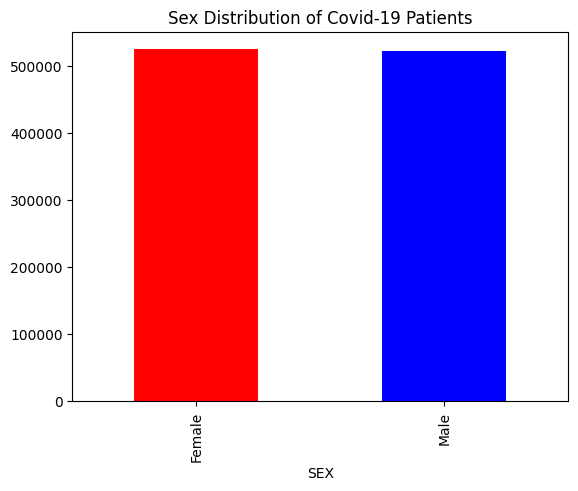

In [14]:
covid["SEX"].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Sex Distribution of Covid-19 Patients")
plt.show()

Observe: 

- we have succesfully replaced the two distributions with "Male" and "Female"
- the distributions are roughly equal, so there is no sex that is less affected


Let's also make it clear if the patient was sent home(1) or hospitalized(2)

In [15]:
covid["PATIENT_TYPE"] = covid['PATIENT_TYPE'].astype('string')
covid['PATIENT_TYPE'] = covid['PATIENT_TYPE'].replace({"1": 'Home', "2": 'Hospital'})

To understand how severe a particular covid case was, it is very important to understand if the patient died or not. Let us create two columns that one-hot encode whether the patient passed away

In [16]:
covid["Lower_Risk"] = covid["DATE_DIED"].apply(lambda x: 1 if x == "9999-99-99" else 0)
covid["Higher_Risk"] = covid["DATE_DIED"].apply(lambda x: 1 if x != "9999-99-99" else 0)

Observe: Based on whether the patients died or survived, I chose to encode the patients as "Higher_Risk" or "Lower_Risk". The rationale is that we can infer the patients who were at high_risk based on the information on whether they survived or not.

Finally, let us get rid of missing data. Instead of 97 or 98 in our categorical columns, let us fill the values with NaN. Then, based on the number of NaN and the underlying distributions, let's make decisions on how to deal with them.

In [17]:
covid = covid.replace({97: np.nan, 98: np.nan, 99: np.nan})

Now, let us see how many NaN (null) values we have for each row and decide the best strategy to deal with them

In [18]:
covid.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
Lower_Risk                   0
Higher_Risk                  0
dtype: int64

Observe:

- The "INTUBED" and "ICU" and "PREGNANT" have over 80% missing values; they do follow the distributions observed in the EDA
- For the remaining columns we have at most 0.5% null values. 
- there are multiple options for dealling with missing data

## <a id='section1_3'></a>Examining Missing Data

The first step in dealing with missing data, is to _understand if there is a pattern_. Data may be missing at random (for example, due to imputation errors) or it might be connected to the other observations. For example, a missing entry for "INTUBED" may also be accompanied by a missing entry in "ICU". The data for "PREGNANT" should necessarily be correlated with the category "FEMALE". In any case,  any particular imputation method should be informed by the data. The strategy to do this is as follows:

1. Look at the distributions of the features with missing and understand if there is any patterns that emerge
2. Use a _missingness_ correlation. This indicates whether missing data in one column predicts the existence of missing data in another column

Information on the missingno library that provides a small toolset for understanding and visualizing data can be found at : https://github.com/ResidentMario/missingno

In [19]:
#select columns with missing data

# select numerical features
num_features = covid.select_dtypes(include=[np.number])
# select feature with no missing data
num_features_no_missing = num_features.dropna(axis=1)
# select features with missing data
num_features_missing = num_features.drop(num_features_no_missing.columns, axis=1)

In [20]:
##these are the columns with no missing data
num_features_no_missing.columns

Index(['USMER', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL', 'Lower_Risk',
       'Higher_Risk'],
      dtype='object')

In [21]:
##these are the columns with missing data
num_features_missing.columns

Index(['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU'],
      dtype='object')

Let's not plot the columns with missing data, and the columns with no missing data

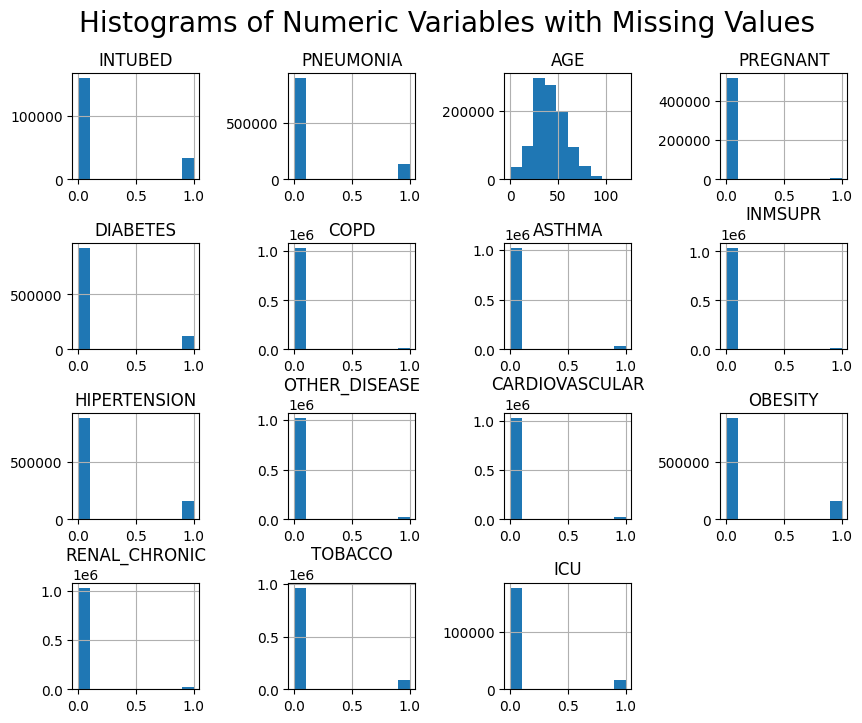

In [22]:
##histograms of the numerical features with missing data
num_features_missing.hist(figsize=(10,8))
plt.subplots_adjust(hspace=0.6, wspace=0.7)
plt.suptitle("Histograms of Numeric Variables with Missing Values", fontsize=20, y=0.96)  
plt.rcParams.update({'font.size': 10})
plt.show()

Observe:

- All distributions above are clearly categorical and one-hot encoded, with the exception of "AGE"
- The categorical distributions are highly skewed, so replacing the data based on most frequent would likely introduce bias

Let's now look at the columns with no missing values and understand how these distributions are shaped.

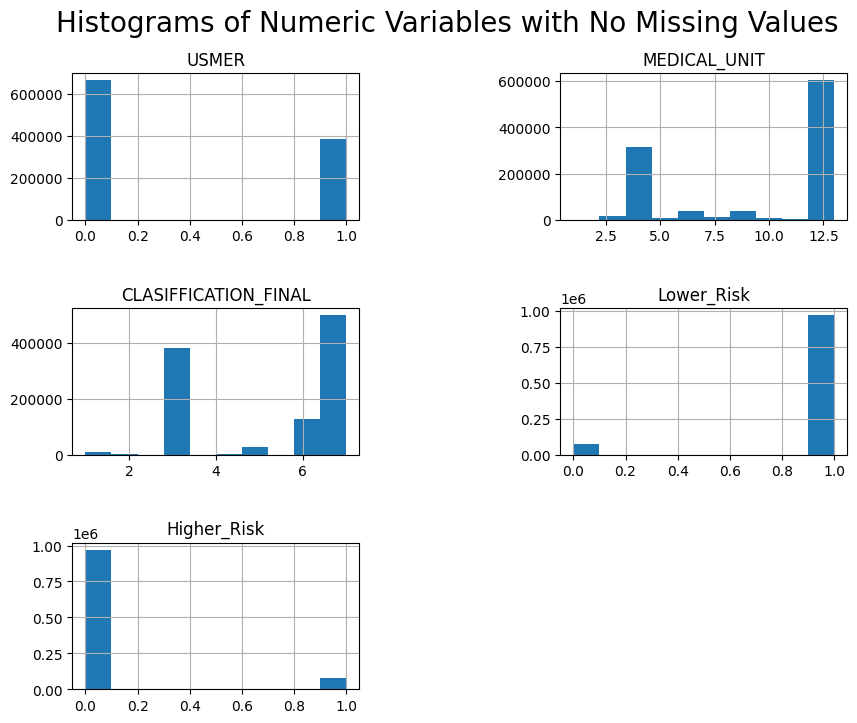

In [23]:
##histograms of the numerical features with no missing data
num_features_no_missing.hist(figsize=(10,8))
plt.subplots_adjust(hspace=0.6, wspace=0.7)
plt.suptitle("Histograms of Numeric Variables with No Missing Values", fontsize=20, y=0.96)
plt.rcParams.update({'font.size': 10})
plt.show()

Observation:

- As before, we are dealing mostly with categorical data

Let us check the "PREGNANT" data and it's relation to "SEX". This is easy to check and clean as only "FEMALE" can have positive "PREGNANT"

In [24]:
covid_pregnant_sex = covid[["PREGNANT", "SEX"]] 

In [25]:
covid_pregnant_sex[covid_pregnant_sex["SEX"] =='Male'].value_counts()

Series([], Name: count, dtype: int64)

In [26]:
covid_pregnant_sex[covid_pregnant_sex["SEX"] =='Female'].value_counts()

PREGNANT  SEX   
0.0       Female    513179
1.0       Female      8131
Name: count, dtype: int64

There are no "PREGNANT" values associated with "Male", but just in case we can try to clean this

In [27]:
covid.loc[:, 'PREGNANT'] = covid["PREGNANT"].apply(lambda x: 0 if x == 'Male' else x) 

In [28]:
covid['PREGNANT'].value_counts()

PREGNANT
0.0    513179
1.0      8131
Name: count, dtype: int64

## <a id='section1_4'></a>Missing Values Correlations

In [29]:
import missingno as msno


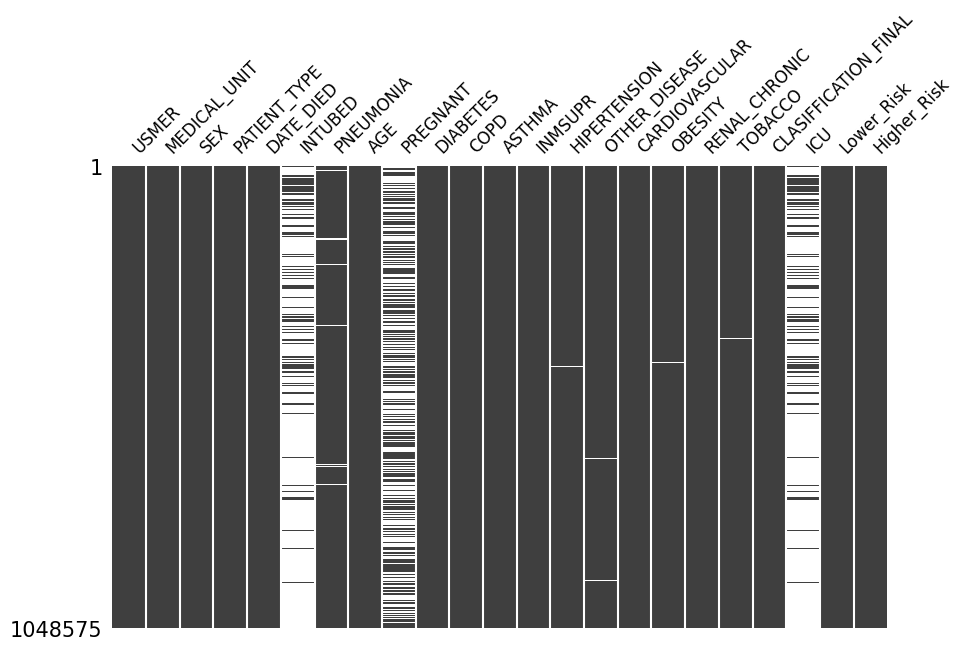

In [30]:
##plot the missing data points scaterred 
msno.matrix(covid, fontsize=12, labels=True, sparkline=False, figsize=(10, 6)) 
plt.show()

Observe:

- There is clearly a missing pattern in "INTUBED" and "ICU" : the missing values seem perfectly correlated
- The columns dealing with diseases seem to be correlated in terms of missing values

In [31]:
# Select numerical features
num_features = covid.select_dtypes(include=[np.number])

In [32]:
num_features.columns

Index(['USMER', 'MEDICAL_UNIT', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'Lower_Risk', 'Higher_Risk'],
      dtype='object')

In [33]:
covid[num_features.columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   INTUBED               192706 non-null   float64
 3   PNEUMONIA             1032572 non-null  float64
 4   AGE                   1048230 non-null  float64
 5   PREGNANT              521310 non-null   float64
 6   DIABETES              1045237 non-null  float64
 7   COPD                  1045572 non-null  float64
 8   ASTHMA                1045596 non-null  float64
 9   INMSUPR               1045171 non-null  float64
 10  HIPERTENSION          1045471 non-null  float64
 11  OTHER_DISEASE         1043530 non-null  float64
 12  CARDIOVASCULAR        1045499 non-null  float64
 13  OBESITY               1045543 non-null  float64
 14  RENAL_CHRONIC         1045569 non-

In [34]:
covid_num = covid[num_features.columns].apply(pd.to_numeric, errors='coerce')

In [35]:
## plot the missingness correlation heatmap
#msno.heatmap(covid_num, figsize=(6,4), fontsize=12)
#plt.show()

Observation :

- Missing entries for "INTUBED" and "ICU| are perfectly correlated; this is because patients must be admitted to an Intensive Care Unit (ICU) in order to be "INTUBED". Hence, data for these two columns should be treated together
- There is a very high correlation of data missing for all diseases: if there is data missing for one disease, it is very likely missing for all other diseases.
- It seems that "PREGNANT" missing values are not correlated with anything else, this data is probably simply not available 

## <a id='section1_5'></a>Dealing with Missing Values

Dropping means that all associated rows will be lost, while imputing does introduce some bias depending on the model used. One  way to deal with this is to look at the number of missing values and the corresponding distributions for each feature, and take decisions to minimise lost data/reduce bias. 

The "AGE" column only has 345 missing values, these can be easily be replaced with the mean of the column without significantly affecting the distribution. Given the number of missing values in the "AGE" column, this must be a case of missing at random errors

In [36]:
##for age we can simply impute the median
covid['AGE'] = covid['AGE'].fillna(covid['AGE'].mean())

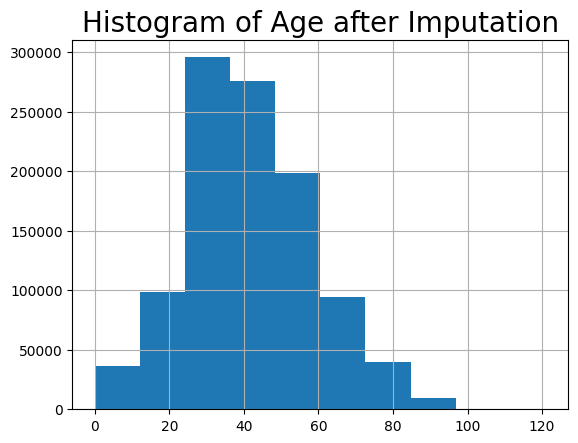

In [37]:
covid['AGE'].hist()
plt.title("Histogram of Age after Imputation", fontsize=20)
plt.show()

Now, the rest of the columns mostly have a number of missing data that is clearly not at random. This is particularly true of the columns associated to diseases : where one disease is missing, data regarding disease is missing too. This columns should be somehow "marked" as missing, so any algorithm learns differently from them. Let us fill them with some value that indicates _missingness_

In [38]:
disease_features = [ 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']

In [39]:
for col in disease_features:
    covid[col] = covid[col].fillna(0.5)

Let's do the same with pregnancy, we introduce 0.5 (between 0 and 1) to indicate a new category of uncertainity. Hence, by 0.5 the value "unknown" is encoded

In [40]:
covid["PREGNANT"] = covid["PREGNANT"].fillna(0.5)

Let's now examine "ICU" and "INTUBED" more closey. If the existing values of these categories are also perfectly correlated there is no need to keep both of them into the final dataset.

In [41]:
corr_icu_intubed = covid[['ICU', 'INTUBED']].corr()

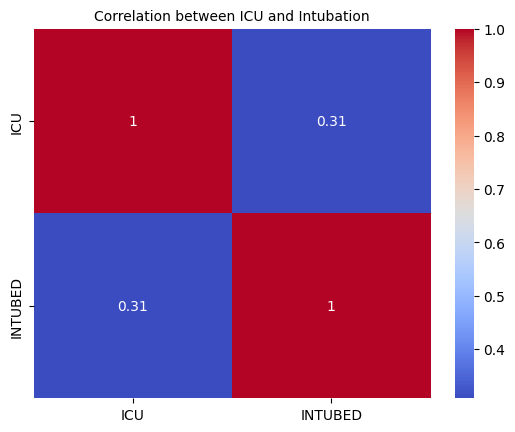

In [42]:
sns.heatmap(corr_icu_intubed, annot=True, cmap='coolwarm')
plt.title("Correlation between ICU and Intubation", fontsize=10)
plt.show()

It turns out the values are moderately correlated, hence it would make sense to deal with the "missingness" of each column while keeping the two values separated.

In [43]:
##this fills the missing values in the INTUBED column with 0.5
covid["INTUBED"] = covid["INTUBED"].fillna(0.5)

In [44]:
##this fills the missing values in the ICU column with 0.5
covid['ICU'] = covid["ICU"].fillna(0.5)


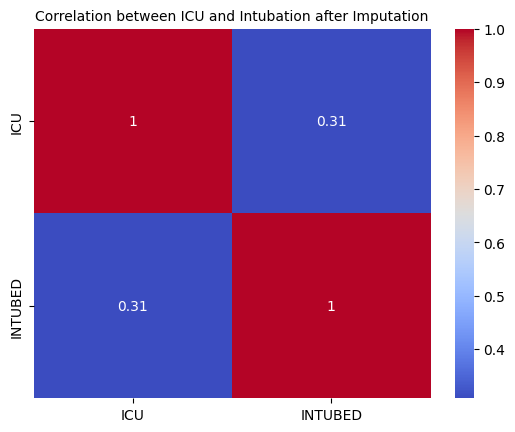

In [45]:
sns.heatmap(corr_icu_intubed, annot=True, cmap='coolwarm')
plt.title("Correlation between ICU and Intubation after Imputation", fontsize=10)
plt.show()

In sum, In all binary columns I introuduced 0.5 to indicate missing information. Although this strategy is simple, it can prove useful when one-hot encoding the categorical columns such that _missingness_ of various types of data also becomes a feature

It is important to create labels based on the "CLASSIFICATION_FINAL" : based on the dictionary <=3  indicates COVID diagnosis, while >=4 means that the patient may not be a carrier of covid

In [46]:
covid['COVID_POSITIVE'] = covid['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x<=3 else 0)
covid['COVID_INCONCLUSIVE'] = covid['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x>=4 else 0)

Since we are interested in distinguishing between high risk patients and low risk patients, I will select the data for which the patients are definitely infected with COVID-19.

<Axes: xlabel='COVID_POSITIVE'>

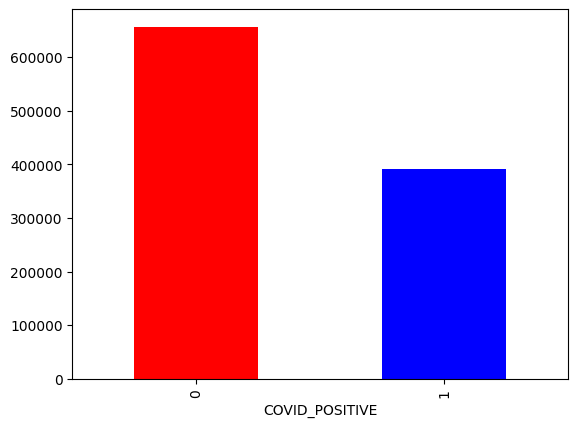

In [47]:
covid['COVID_POSITIVE'].value_counts().plot(kind='bar', color=['red', 'blue'])

In [48]:
##this is the dataframe of covid positive patients
covid_positive = covid[covid['COVID_POSITIVE'] == 1]

In [49]:
covid_positive.shape

(391979, 25)

The COVID_POSITIVE and COVID_INCONCLUSIVE columns are no longer necessary in the final dataframe, since it is clear that this contains all COVID-19 infected people. The same is true for the date the patient died, as we already classified everyone who died as High Risk. Also, since Higher Risk and Lower risk are complementary, we only need Higher Risk as our response.

In [50]:
covid_positive = covid_positive.drop(['COVID_POSITIVE', 'COVID_INCONCLUSIVE', 'DATE_DIED', 'Lower_Risk'], axis=1)
covid_positive.shape

(391979, 21)

In [51]:
covid_positive.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU',
       'Higher_Risk'],
      dtype='object')

## <a id='section1_6'></a>Clean Data Visualization

Let us visualize the clean data and see if any interesting patterns are immediately spotted.

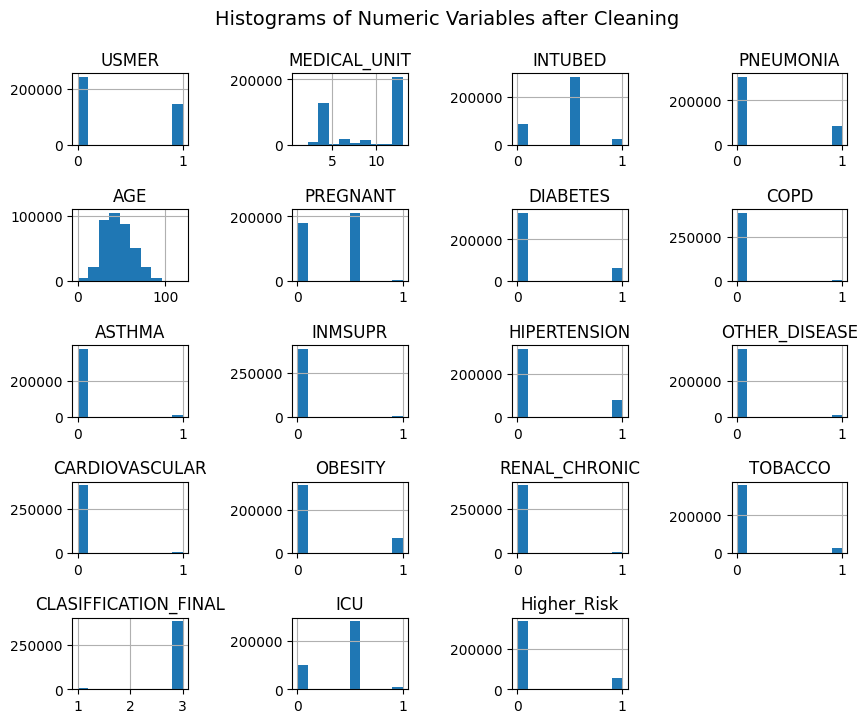

In [52]:
covid_positive.hist(figsize=(10,8))
plt.subplots_adjust(hspace=0.9, wspace=0.9)
plt.suptitle("Histograms of Numeric Variables after Cleaning", fontsize=14, y=0.96)
plt.rcParams.update({'font.size': 10})

Observe: 

- We have clean data, and the unknown data is simply encoded as 0.5
- Most distributions are certainly skewed: there are many patients without diseases than with any diseases
- The majority of the patients in this data set survived covid, so only a small proportion died (imbalanced classes)
- Less than half of the admited patients were diagnosed with Covid
- Most features are highly imbalanced
- ICU and INTUBED seem to contain the same information

Let's also look at some descriptive statistics

In [53]:
covid_positive.describe()

,USMER,MEDICAL_UNIT,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Higher_Risk
count,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.00000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000,391979.000000
mean,0.375342,8.697948,0.420354,0.219509,45.169177,0.27601,0.160299,0.017316,0.028232,0.014025,0.197513,0.028282,0.023474,0.187384,0.022009,0.075167,2.951393,0.386636,0.138365
std,0.484212,3.764235,0.252334,0.413912,16.434031,0.25561,0.365630,0.127196,0.163097,0.113596,0.397010,0.161617,0.148446,0.389113,0.143748,0.261921,0.300216,0.239080,0.345283
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,4.000000,0.500000,0.000000,33.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,12.000000,0.500000,0.000000,44.000000,0.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000
75%,1.000000,12.000000,0.500000,0.000000,56.000000,0.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000
max,1.000000,13.000000,1.000000,1.000000,120.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


Observe:

- 75% of patients are under the age of 56

Let's also look at the categorical distributions

In [54]:
cat_covid = covid_positive.select_dtypes(include=['string']) 

In [55]:
cat_covid.columns

Index(['SEX', 'PATIENT_TYPE'], dtype='object')

Observe: There are only two "String" columns, "SEX" and "PATIENT_TYPE"

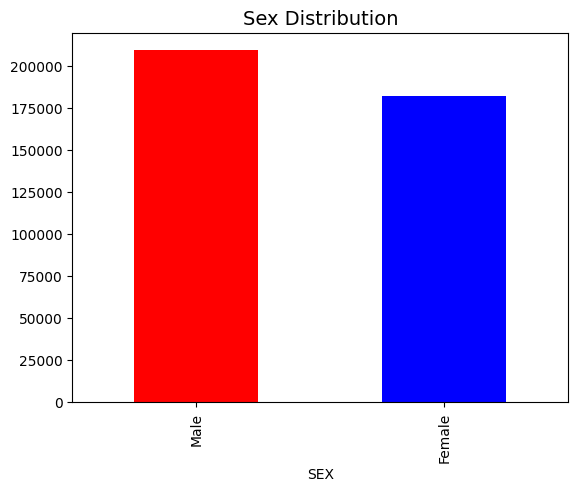

In [56]:
covid_positive["SEX"].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Sex Distribution", fontsize=14)
plt.show()

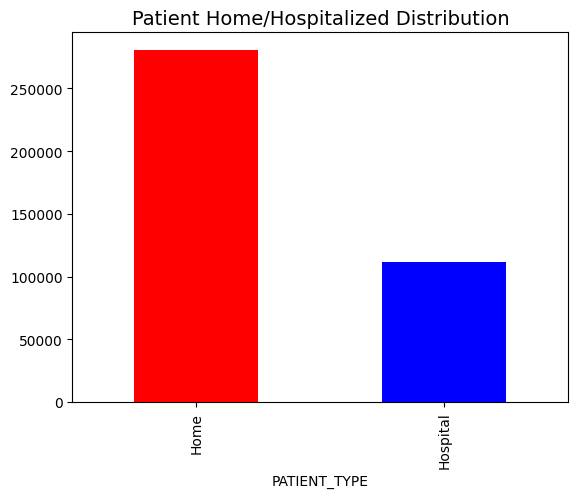

In [57]:
covid_positive["PATIENT_TYPE"].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Patient Home/Hospitalized Distribution", fontsize=14)
plt.show()

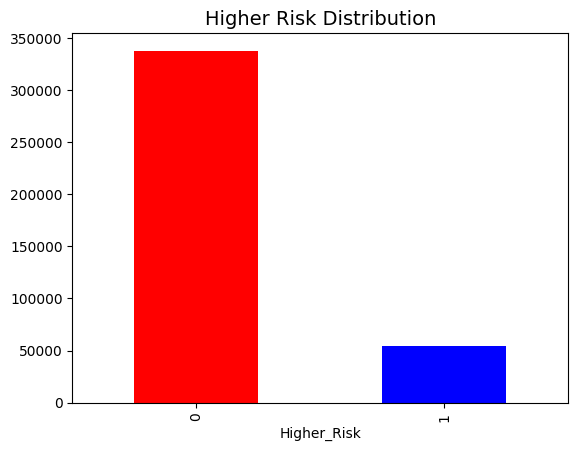

In [58]:
covid_positive["Higher_Risk"].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Higher Risk Distribution", fontsize=14)
plt.show()

In [59]:
covid_positive["Higher_Risk"].value_counts()[1]

54236

In [60]:
print("The percentage of patients at higher risk is", covid_positive["Higher_Risk"].value_counts()[1]/covid_positive["Higher_Risk"].value_counts()[0]*100) 

The percentage of patients at higher risk is 16.058363903915108


Note:

<ul>

1. The majority of the patients diagnosed with COVID-19 survived. When building a model that detects higher risk (the labels of higher risk are associated with patients that passed away) it is important to provide a high level of confidence in predictions of patients at high risk. This means the model should provide as few false negatives (FN) as possible. This is because a patient which is at high risk (positive) must receive urgent care to improve chances of survival. If this type of patient is classified as negative (not at high risk), then this could result in urgent care being delayed which could lead to loss of life, which is what this classification model tries to prevent. Hence, it is important that the model achieves high confidence in positive predictions, which is even more important that patients which are not at high risk being misclassified.

2. The classes "Higher_Risk", "Lower_Risk" are imbalanced, in the sense that there is a small percentage of the total patients at high risk (close to 16%). This means that *model accuracy* is crucial to be above a 84%%, anything less is just a random classifier due to the proportions of classes. 

3. In selecting the model, it is very important to be able to interpret the predictions. As such, I will aim to have a high as possible recall for the model (TPR). The true positive rate gives the ratio of correctly idetified positives $TPR = TP/(TP+FN)$ where TP stands for true positives (correctly classified cases) and FN stands for false negatives (positives that are incorrectly) classified. The recall (TPR) is even more important than accuracy for this problem, as recall can be clearly interpreted as the probability that a given prediction of a patient at high risk is correct.

</ul>

## Automate data cleaning

All transformations we experimented with can easily be automated, such that we get clean data from the original dataframe.

In [61]:
# get clean data
def get_clean_data(df):

    """ Function that implements the important cleaning operations on the dataset
    df: the dataset to be cleaned"""

    # List of conditions
    conditions = ['USMER', 'INTUBED', 'PNEUMONIA',  'PREGNANT', 
              'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
              'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
              'RENAL_CHRONIC', 'TOBACCO', 'ICU']
    
    #replace "2" with 0 in categorical columns that show the presence of a symptom
    for condition in conditions:
        df[condition] = df[condition].replace(2, 0)

    # Deal with 'SEX' column
    df["SEX"] = df['SEX'].astype('string')
    df['SEX'] = df['SEX'].replace({"1": 'Female', "2": 'Male'})

    # Deal with 'PATIENT_TYPE' column
    df["PATIENT_TYPE"] = df['PATIENT_TYPE'].astype('string')
    df['PATIENT_TYPE'] = df['PATIENT_TYPE'].replace({"1": 'Home', "2": 'Hospital'})

    # Create response variables
    df["Lower_Risk"] = df["DATE_DIED"].apply(lambda x: 1 if x == "9999-99-99" else 0)
    df["Higher_Risk"] = df["DATE_DIED"].apply(lambda x: 1 if x != "9999-99-99" else 0)

    # Replace 97, 98, 99 with NaN
    df = df.replace({97: np.nan, 98: np.nan, 99: np.nan})

    # Impute median for age
    df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

    # missing feats
    mis_features = [ 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'PREGNANT', 'INTUBED']
    
    # Impute 0.5 for missing values
    for col in mis_features:
        df[col] = df[col].fillna(0.5)

    # Select positive cases
    df['COVID_POSITIVE'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x<=3 else 0)
    df['COVID_INCONCLUSIVE'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x>=4 else 0)

    # create new dataframe only with positive
    df_positive = df[df['COVID_POSITIVE'] == 1]

    # Drop columns
    df_positive = df_positive.drop(['COVID_POSITIVE', 'COVID_INCONCLUSIVE', 'DATE_DIED', 'Lower_Risk'], axis=1)


    return df_positive


Observe:

- The function above, incorporates all the cleaning operations I have previously decided upon, into one function. 

In [62]:
covid_clean = get_clean_data(covid)

In [63]:
covid_clean 

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Higher_Risk
0,0,1,Female,Home,0.5,1.0,65.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0.5,1
2,0,1,Male,Hospital,1.0,0.0,55.0,0.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1
4,0,1,Male,Home,0.5,0.0,68.0,0.5,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0.5,1
5,0,1,Female,Hospital,0.0,1.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0
6,0,1,Female,Home,0.5,0.0,64.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,Female,Hospital,0.0,0.0,77.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0
1047934,1,13,Female,Home,0.5,0.0,55.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5,0
1047935,1,13,Male,Home,0.5,0.0,70.0,0.5,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0.5,0
1047936,0,13,Male,Home,0.5,0.0,32.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5,0


In [64]:
# check if the clean data is identical to the previous one
covid_positive.equals(covid_clean)

True

Note:

- The function simply implemented the previous transformations that cleaned the data.

# <a id='section2'></a>2. Split the Data

Before I do anything else, I will create a training set, a test set and a validation set. This is to avoid contamining the data by further exploration on the training set. However, one consideration must be kept in mind, which is the very high imbalanced classes to be predicted - as the ratio of imbalanced classes is close to 8:100, we are dealing with highly imbalanced classes.

## <a id='section2_2'></a>Train/Test

Now we can create training and test sets from the new balanced samples. To do this, I will use Scikit-Learn as in the following.

In [65]:
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")

Scikit-learn version: 1.4.2


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
##split the original data (no undersampling) into train and test sets
train, test = train_test_split(covid_clean, test_size=0.2, stratify =covid_clean['Higher_Risk'], random_state=1923)

In [68]:
##check the proportions of the higher risk group in both the training and test sets
print(train["Higher_Risk"].value_counts()/len(train))
print(test["Higher_Risk"].value_counts()/len(test))

Higher_Risk
0    0.861635
1    0.138365
Name: count, dtype: float64
Higher_Risk
0    0.861638
1    0.138362
Name: count, dtype: float64


As seen above, the test set and the training set have similar proportions of the minority class (Higher Risk patients)

Let us do all exploration on a copy of the covid data. The models will be tested on the training sets that are randomly sampled, and the ones that are consistently performant will be selected.

In [69]:
covid_eda = train.copy()

#  <a id='section3'></a>3. Explore the Data

## <a id='section3_1'></a>Looking for Correlations

In [70]:
covid_eda.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Higher_Risk
446648,0,12,Female,Hospital,0.0,1.0,68.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3,0.0,1
582398,0,12,Female,Home,0.5,0.0,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5,0
629289,0,12,Male,Home,0.5,0.0,22.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5,0
585391,1,12,Male,Hospital,0.0,1.0,69.0,0.5,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0
573687,0,12,Male,Hospital,0.0,0.0,52.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0


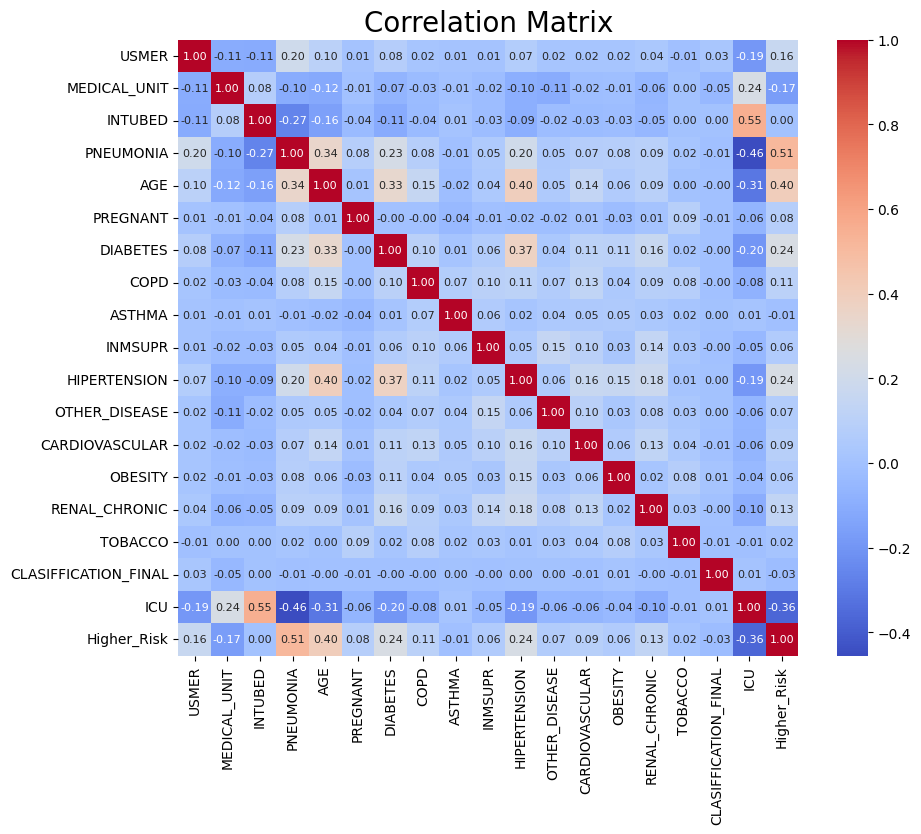

In [71]:
covid_num = covid_eda.select_dtypes(include=[np.number])
corr_cov = covid_num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_cov, annot=True, cmap='coolwarm',  fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Observe:

- High correlation between ICU and INTUBED: This is expected also due to imputed values for uncertainity (missing data in one column perfectly predicts missing data in another columns)
- There is a high correlation between Higher_Risk and PNEUMONIA (46%) and Higher_risk and AGE (32) : this suggests older patients with pneumonia are at risk of death
- AGE and HIPERTENSION are also correlated
- The correlation between COVID_POSITIVE and Higher_risk is only 19%, which suggest that other factors might be at play
- PNEUMONIA is also a risk factor for being admitted into intensive care (46%) correlation
- AGE increases the probability of "DIABETES" and "HIPERTENSION"
- There is a 36% correlation of being admitted at ICU (Intensive Care Unit) and surviving covid : this suggests that receiving emergency care can definitely increase the chances of survival for patients with COVID-19

In [72]:
##let's look at factors that are highly correlated with death
corr_cov["Higher_Risk"].sort_values(ascending=False)

Higher_Risk             1.000000
PNEUMONIA               0.515000
AGE                     0.398559
DIABETES                0.238632
HIPERTENSION            0.235139
USMER                   0.160149
RENAL_CHRONIC           0.131561
COPD                    0.106502
CARDIOVASCULAR          0.090065
PREGNANT                0.079766
OTHER_DISEASE           0.066278
OBESITY                 0.060654
INMSUPR                 0.056669
TOBACCO                 0.015292
INTUBED                 0.003431
ASTHMA                 -0.010641
CLASIFFICATION_FINAL   -0.027962
MEDICAL_UNIT           -0.169646
ICU                    -0.364731
Name: Higher_Risk, dtype: float64

Observe:

 - Pneumonia, Age, Diabetes and Hypertension are good predictors of death for COVID-19 patients.

## <a id='section3_2'></a>Experimenting with Transformations

It is clear that most columns are categorical, contains positives, negatives and missing values. To deal with this data, we can use KBinsDiscretizer that uses a Kmeans algorithm to bucketize the columns and visualize how close it is to our predictions.

In [73]:
##Let's deal with the categories that are already encoded
cat_num = covid_eda.select_dtypes(include=[np.number])
cat_num.drop(['MEDICAL_UNIT', 'AGE', 'CLASIFFICATION_FINAL'], axis=1, inplace=True)

In [74]:
[cat_num.columns]

[Index(['USMER', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD',
        'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
        'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'Higher_Risk'],
       dtype='object')]

array([[<Axes: title={'center': 'ICU'}>,
        <Axes: title={'center': 'INTUBED'}>]], dtype=object)

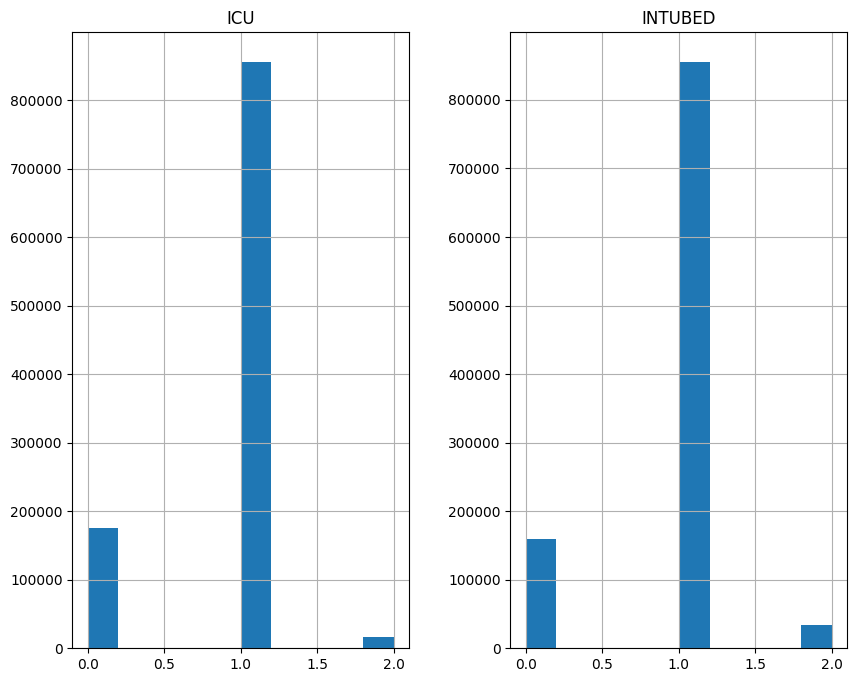

In [75]:
from sklearn.preprocessing import KBinsDiscretizer
dataframe_urgent = covid[['ICU', 'INTUBED']].copy() ##create a new dataframe with only with numerical columns
##create an instance of the KBinsDiscretizer class with 3 bins and the kmeans strategy; 
##the encode argument is set to ordinal to label each bin with an integer
##the k-means strategies ensures that values in each bin have the same nearest center of a 1D k-means cluster
discretizer_3bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', subsample=200_000)
##let's now transform the data and plot it to examine if the results is very different from the manual approach
dataframe_buketized = discretizer_3bins.fit_transform(dataframe_urgent)
dataframe_buketized = pd.DataFrame(dataframe_buketized, columns=['ICU', 'INTUBED'])
##let us plot the histograms of the bucketized data
dataframe_buketized.hist(figsize=(10,8))

The Discretizer has simply replaced the values of the original distributions with ordinal numbers. Hence, using K-means with 3 clusters, it found very similar categories (the edges of the discretizer are given in the cell below)

In [76]:
##this shows the edges of the bins
for i, edges in enumerate(discretizer_3bins.bin_edges_):
    print(f"{edges}")

[0.   0.25 0.75 1.  ]
[0.   0.25 0.75 1.  ]


An alternative treatment, is to transform these column types to "object" and then one-hot encode based on the original values while keeping in mind that "0.5" indicates missing values ( remember that I used "0.5" to encode missing values for categorical one-hot encoded columns)

In [77]:
for col in cat_num.columns: 
    covid_eda[col] = covid_eda[col].astype('string')

In [78]:
covid_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313583 entries, 446648 to 492124
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 313583 non-null  string 
 1   MEDICAL_UNIT          313583 non-null  int64  
 2   SEX                   313583 non-null  string 
 3   PATIENT_TYPE          313583 non-null  string 
 4   INTUBED               313583 non-null  string 
 5   PNEUMONIA             313583 non-null  string 
 6   AGE                   313583 non-null  float64
 7   PREGNANT              313583 non-null  string 
 8   DIABETES              313583 non-null  string 
 9   COPD                  313583 non-null  string 
 10  ASTHMA                313583 non-null  string 
 11  INMSUPR               313583 non-null  string 
 12  HIPERTENSION          313583 non-null  string 
 13  OTHER_DISEASE         313583 non-null  string 
 14  CARDIOVASCULAR        313583 non-null  string 
 15  

In [79]:
##let's create a dataframe containing all categories (string columns)
covid_eda_all_cat = covid_eda.select_dtypes(include=['string'])

In [80]:
covid_eda_all_cat

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,Higher_Risk
446648,0,Female,Hospital,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
582398,0,Female,Home,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
629289,0,Male,Home,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
585391,1,Male,Hospital,0.0,1.0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
573687,0,Male,Hospital,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527538,0,Male,Home,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
567736,0,Male,Home,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
121787,0,Male,Hospital,0.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0
544777,1,Male,Home,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0


Now, let us one-hot encode these features. To do this, I will built a pipeline via the tools provided with Scikit-Learn.

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline  

In [82]:
##pipeline that one-hot encodes the categorical features
one_hot = make_pipeline(OneHotEncoder(sparse_output = False, handle_unknown='ignore'))

In [83]:
##let us apply the pipeline to the categorical features
cat_num_onehot = one_hot.fit_transform(covid_eda_all_cat)

In [84]:
##this returns a numpy array with one-hot encoded features
cat_num_onehot

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [85]:
##we can put the one-hot encoded features in a dataframe
cat_num_onehot = pd.DataFrame(cat_num_onehot, columns = one_hot.get_feature_names_out(), index=covid_eda_all_cat.index)

In [86]:
##we have easilty one-hot encoded the categorical features and put them in a dataframe while preserving the index
cat_num_onehot

,USMER_0,USMER_1,SEX_Female,SEX_Male,PATIENT_TYPE_Home,PATIENT_TYPE_Hospital,INTUBED_0.0,INTUBED_0.5,INTUBED_1.0,PNEUMONIA_0.0,...,RENAL_CHRONIC_0.5,RENAL_CHRONIC_1.0,TOBACCO_0.0,TOBACCO_0.5,TOBACCO_1.0,ICU_0.0,ICU_0.5,ICU_1.0,Higher_Risk_0,Higher_Risk_1
446648,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
582398,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
629289,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
585391,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
573687,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527538,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
567736,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
121787,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
544777,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [87]:
cat_num_onehot.shape

(313583, 50)

Observe:

-The number of categories greatly increased due to having one-hot encoded features

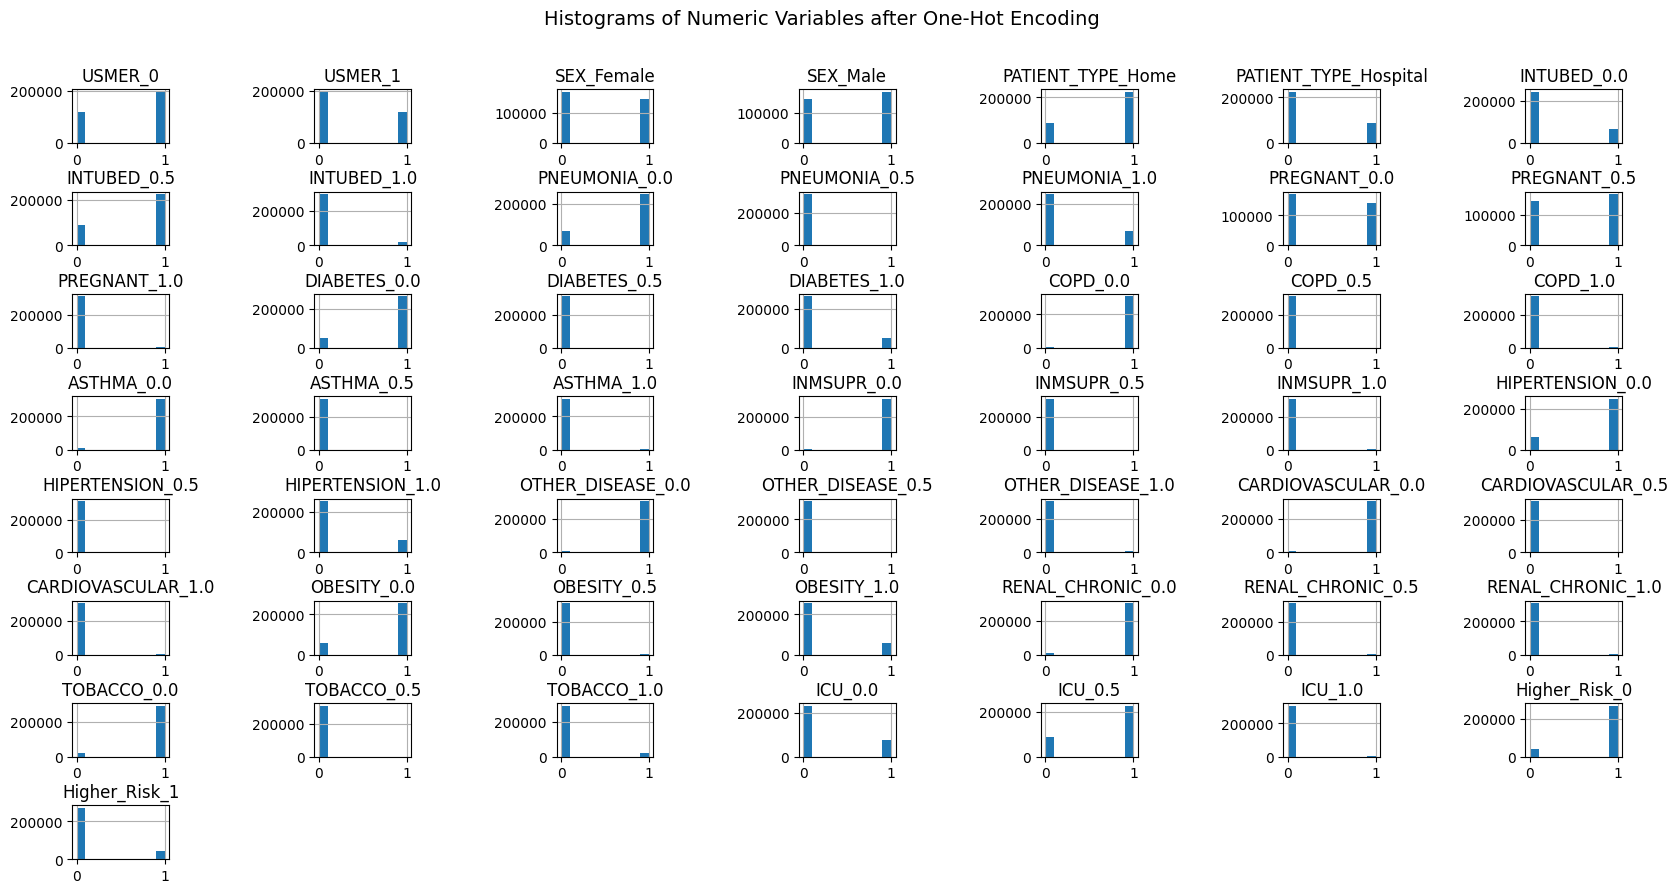

In [88]:
##let us visualize the new features
cat_num_onehot.hist(figsize=(20,10))
plt.subplots_adjust(hspace=0.9, wspace=1.5)
plt.suptitle("Histograms of Numeric Variables after One-Hot Encoding", fontsize=14, y=0.96)
plt.rcParams.update({'font.size': 8})


Observe: 

- all the new columns have the feature and the characteristic they one-hot encode: 0.0 is a negative, 1.0 is a positive and 0.5 is a missing value
- for the "SEX" and "PATIENT_TYPE" as well as for the COVID results we have one-hot encoded categories
- all these can be fed to the machine learning model

One category that we did not treat is the medical unit. We can try to find clusters with KMEans and Bucketize

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[<Axes: title={'center': 'MEDICAL_UNIT'}>]], dtype=object)

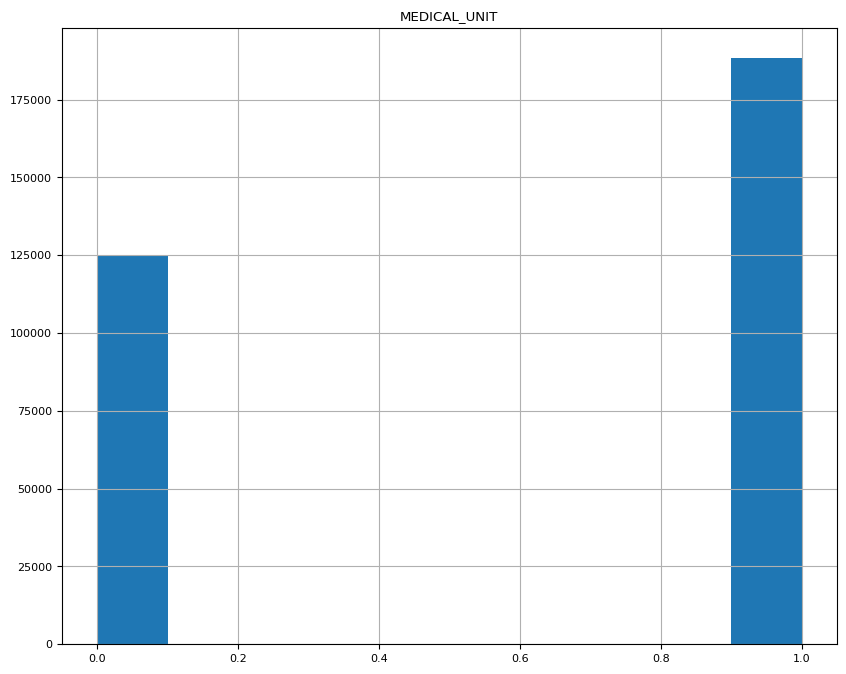

In [89]:

dataframe_medunit = covid_eda[['MEDICAL_UNIT']].copy() 
##let's create a discretizer with 2 bins and the kmeans strategy;
discretizer_2bins = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')
##let's now transform the data and plot it to examine if the results is very different from the manual approach
dataframe_buketized_med = discretizer_2bins.fit_transform(dataframe_medunit)
dataframe_buketized_med = pd.DataFrame(dataframe_buketized_med, columns=['MEDICAL_UNIT'])
##let us plot the histograms of the bucketized data
dataframe_buketized_med.hist(figsize=(10,8))

In [90]:
##let's look at the edges of the bins
for i, edges in enumerate(discretizer_2bins.bin_edges_):
    print(f"{edges}")

[ 1.          7.93952348 13.        ]


It seems that the Discretizer has grouped the instances between 1 and 8, and 8 and 13. This seems consistent with the previous distribution. As there is not information on what the numbers associated with the medical units mean, everything is grouped under two clusters, showing "Type I" Medical Unit and "Type II" Medical Unit

# 4. <a id='section4'></a>Pre-process data for Machine Learning Algorithms

- The previous transformations can all be put into pipelines
- I will build a pipeline that contains the one-hot encoding transformations, as well as scalling 
- I will then apply this pipeline to data : training, test and validation
- With the help of an evaluation metric, I will then test various ML models from Scikit-Learn

## <a id='section4_1'></a>Built a Pre-Processing Pipeline

In [91]:
##column transformers to organize the pipelines
from sklearn.compose import ColumnTransformer
##make_pipeline to create a pipeline based on Function transformers
from sklearn.pipeline import make_pipeline
##StandardScaler to scale the numerical features
from sklearn.preprocessing import StandardScaler
##and function transformer to apply the discretizer
from sklearn.preprocessing import FunctionTransformer


In [92]:
##displays transformations
from sklearn import set_config

set_config(display='diagram')

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # transform to string
        return X.astype(str)

    def get_feature_names_out(self, input_features=None):
        # Implement this method to return the feature names
        return input_features

In [94]:
##this creates a pipeline that transforms to string then does one-hot encoding
cat_pipeline_default = make_pipeline(
                CustomTransformer(),
                OneHotEncoder(handle_unknown='ignore')
                ) 

##this creates a pipeline that only does one-hot encoding
cat_pipeline = make_pipeline(
                OneHotEncoder(handle_unknown='ignore')
                )

In [95]:
##Now I am creating two pipelines for discretizing, and one-hot-encoding.

bucket_pipeline_1 = make_pipeline(
    KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans', subsample=200_000, random_state=41),
     OneHotEncoder(handle_unknown='ignore')) 



In [96]:
## now for standard scaling
num_pipeline = make_pipeline(
    StandardScaler()
)

Now let us define the pre-processing pipeline, that allows the transformations to be imputed

In [97]:
preprocessing = ColumnTransformer([
        
        ('categorical', cat_pipeline_default, ['USMER', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD',
        'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
        'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']),
        ('numerical', num_pipeline, ['AGE']),
        ('categorical simple', cat_pipeline, ['SEX', 'PATIENT_TYPE']),
         ('drop', 'drop', ['CLASIFFICATION_FINAL', 'MEDICAL_UNIT']), # we do not need medical_unit
    ], remainder='passthrough')

Let us test it on a copy of the data

In [98]:
covid_prep = covid_positive.copy()

In [99]:
covid_prep = covid_prep.drop(['Higher_Risk'], axis=1)

In [100]:
preprocessing.fit(covid_prep)

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 Pipeline(steps=[('customtransformer',
                                                  CustomTransformer()),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['USMER', 'INTUBED', 'PNEUMONIA', 'PREGNANT',
                                  'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
                                  'HIPERTENSION', 'OTHER_DISEASE',
                                  'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
                                  'TOBACCO', 'ICU']),
                                ('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE']),
                                ('categorical simple',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['SEX', 'PATIENT_TYPE']),
                                ('drop', 'drop',
                                 ['CLASIFFICATION_FINAL', 'MEDICAL_UNIT'])])

In [101]:
##save the preprocessing pipeline
import joblib
from joblib import dump
joblib.dump(preprocessing, 'preprocessing_pipeline.pkl')

['preprocessing_pipeline.pkl']

In [102]:
covid_pip_prep = preprocessing.transform(covid_prep)

In [103]:
##after pre-processing, we have a numpy array. Let us put it in a dataframe
covid_pip_prep =pd.DataFrame(covid_pip_prep, columns=preprocessing.get_feature_names_out(), index=covid_prep.index)

In [104]:
covid_pip_prep

,categorical__USMER_0,categorical__USMER_1,categorical__INTUBED_0.0,categorical__INTUBED_0.5,categorical__INTUBED_1.0,categorical__PNEUMONIA_0.0,categorical__PNEUMONIA_0.5,categorical__PNEUMONIA_1.0,categorical__PREGNANT_0.0,categorical__PREGNANT_0.5,...,categorical__TOBACCO_0.5,categorical__TOBACCO_1.0,categorical__ICU_0.0,categorical__ICU_0.5,categorical__ICU_1.0,numerical__AGE,categorical simple__SEX_Female,categorical simple__SEX_Male,categorical simple__PATIENT_TYPE_Home,categorical simple__PATIENT_TYPE_Hospital
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.206694,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.598200,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.389242,0.0,1.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.314541,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.145845,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.936887,1.0,0.0,0.0,1.0
1047934,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.598200,1.0,0.0,1.0,0.0
1047935,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.510941,0.0,1.0,1.0,0.0
1047936,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,-0.801337,0.0,1.0,1.0,0.0


<Figure size 2000x1000 with 0 Axes>

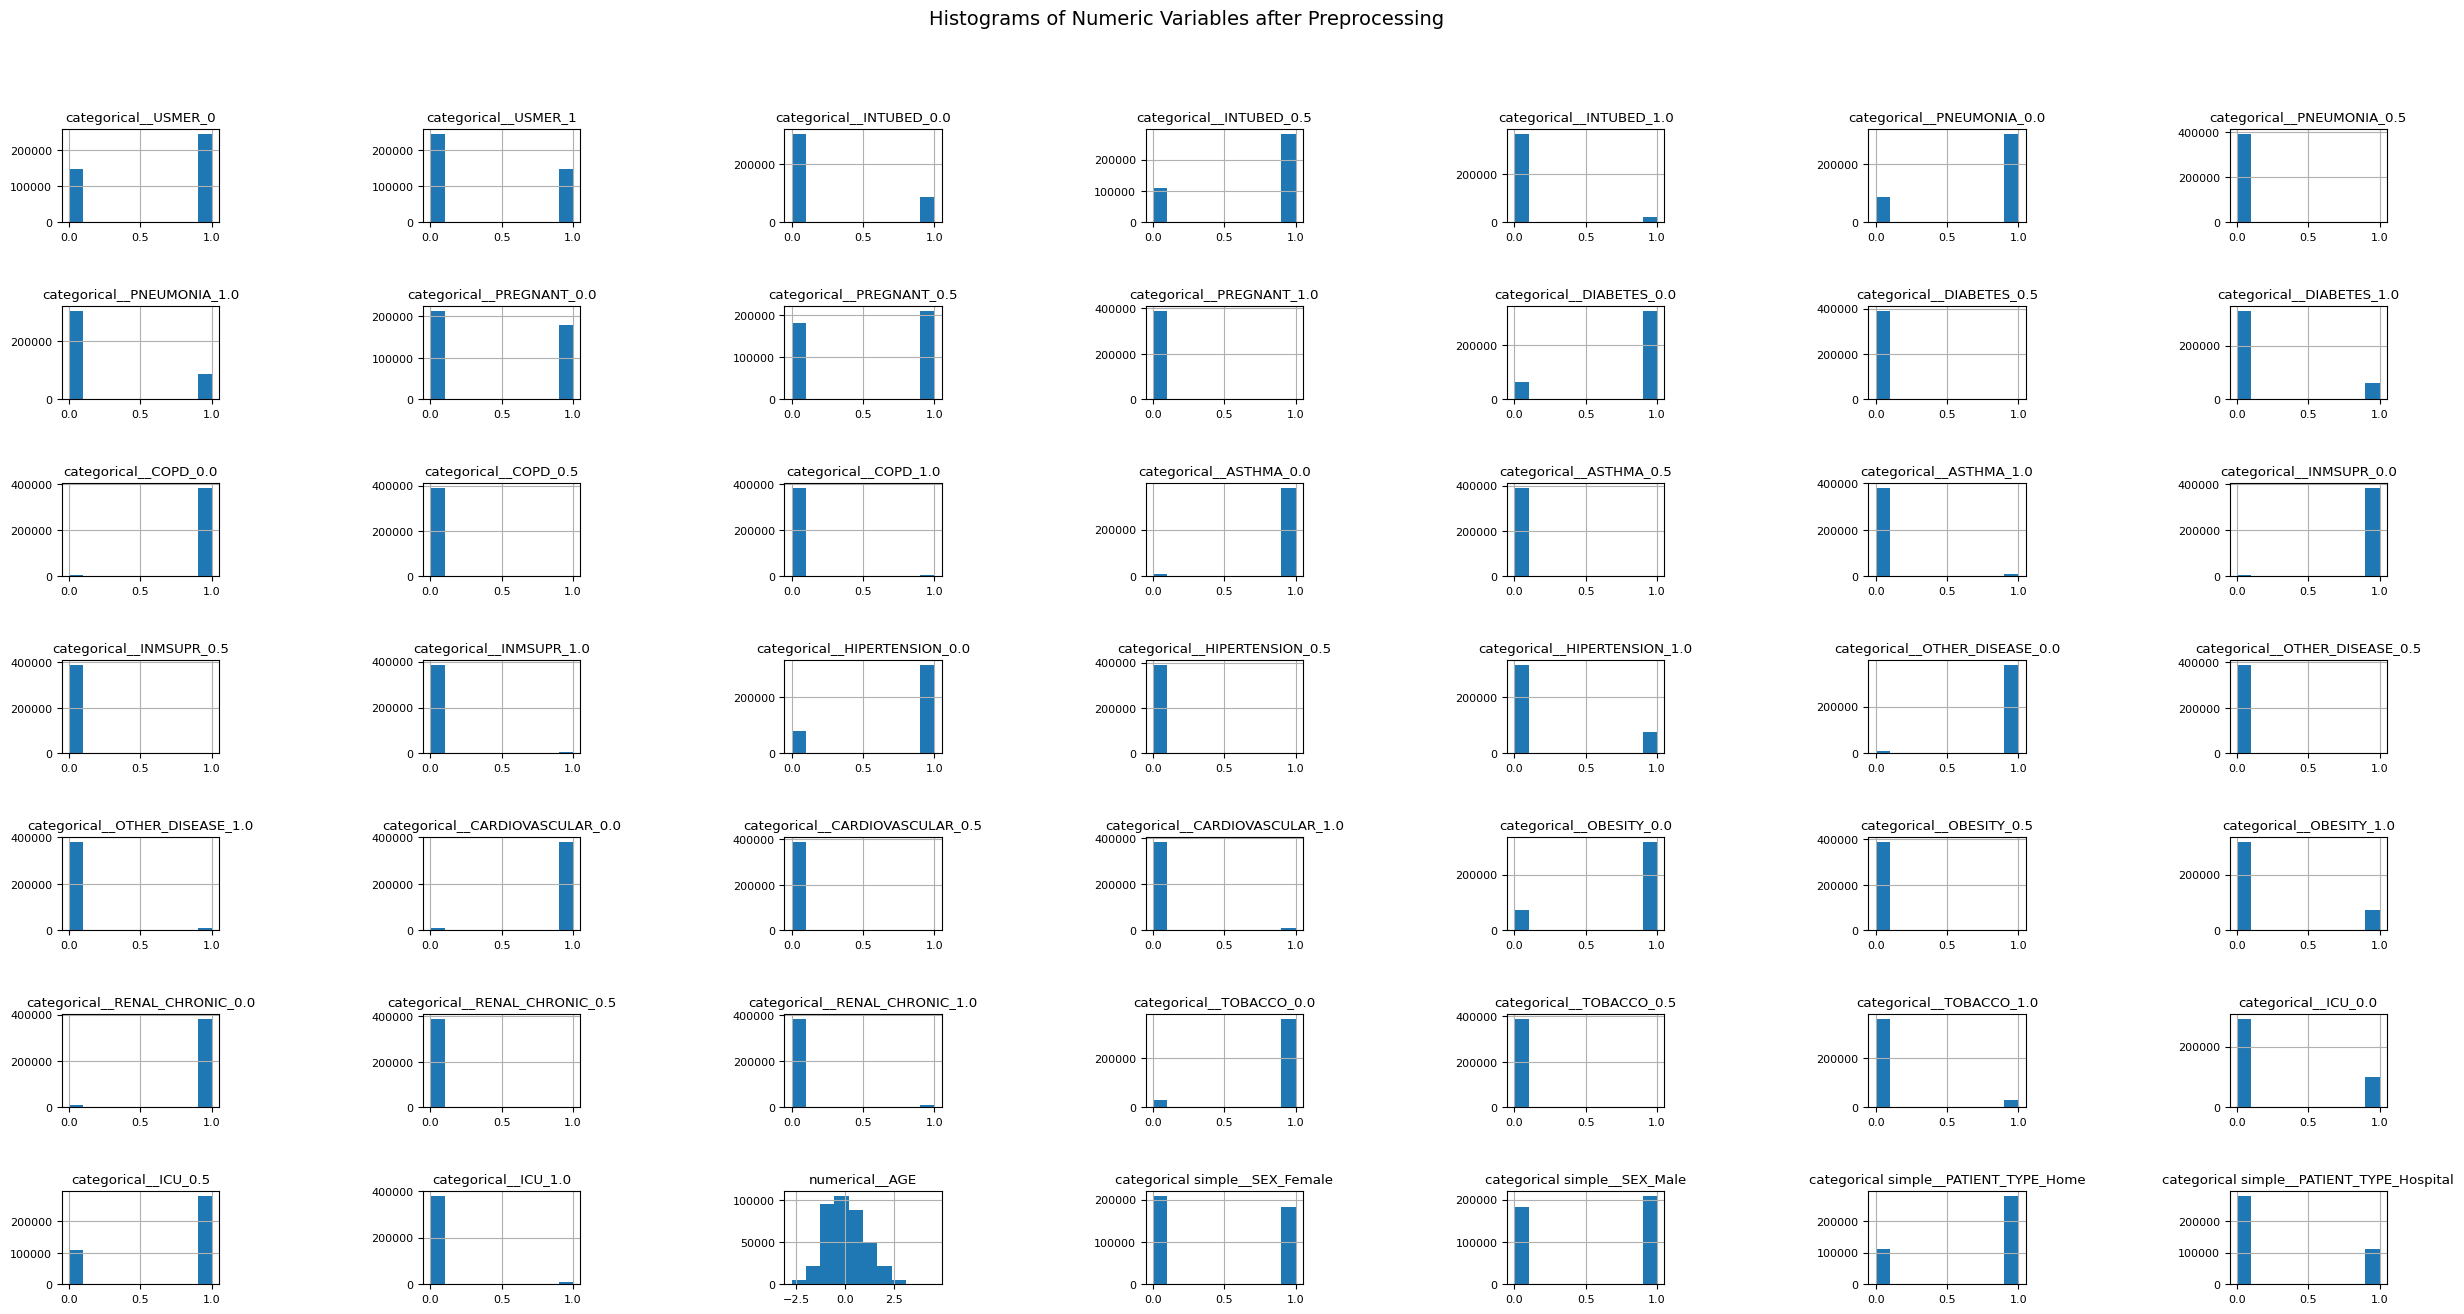

In [105]:
##let's look at the histograms
plt.figure(figsize=(20,10))
covid_pip_prep.hist(figsize=(30,15))
plt.subplots_adjust(hspace=0.9, wspace=1.3)
plt.suptitle("Histograms of Numeric Variables after Preprocessing", fontsize=14, y=0.96)
plt.rcParams.update({'font.size': 10})
plt.show()

Great! Before proceeding any further, let us define an evaluation metric

## <a id='section4_2'></a>Evaluation Metric

In [106]:
# Import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score


## Evaluation function that defines the metrics to be used for evaluating the models

def evaluation_metric(model, xTrain, yTrain, xTest, yTest):

    """ Function that fits the model to the training data, and evaluates the model using the training and test sets
    model: the model to be evaluated
    xTrain: the training features
    yTrain: the training labels
    xTest: the test features
    yTest: the test labels """

    ##fit the model to the training set
    model.fit(xTrain, yTrain)

    # Predict on training set
    yTrain_pred = model.predict(xTrain)

    # Predict on test set
    yTest_pred = model.predict(xTest)


    # Cross-validation scores

    ##cross validation scores for the training set. cv=5 means 5-fold cross validation ( there are 5 folds used for cross validation)
    scores_train = cross_val_score(model, xTrain, yTrain, cv=5)
    mean_cv_train = scores_train.mean()
    print("-"*100)
    print("The mean cross validation score on the training set is:", mean_cv_train)


    ##cross validation scores for the test set
    scores_test = cross_val_score(model, xTest, yTest, cv=5)
    mean_cv_test = scores_test.mean()
    print("-"*100)
    print("The mean cross validation score on the test set is:", mean_cv_test)

    ##fpr is the false positive rate, tpr is the true positive rate
    ##The roc_curve method calculates the aforemntioned rates for different thresholds and plot the results based on the test labels and the predicted labels
    ## We first must calculate the probabilities of the positive class
    yTest_prob = model.predict_proba(xTest)[:,1]
    fpr, tpr, thresholds = roc_curve(yTest, yTest_prob)
    ## the roc_curve method requires the second argument to be either probability estimates of the positive class, confidence values, or non-thresholded measure of decisions
    ## the roc_curve below used the probability estimates of the positive class as given by the predict_proba method (yTest_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
    plt.plot([0, 1], [0, 1], "k--", label="Random classifier's ROC curve")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()


    ##the AUC score is the area under the ROC curve
    auc_score = roc_auc_score(yTest, yTest_prob)
    print("-"*100)
    print("The AUC score is:", auc_score)

    ##accuracy score of predictions
    acc_score = accuracy_score(yTest, yTest_pred)
    print("-"*100)
    print("The accuracy score is:", acc_score)


    ##true negative rate
    print("-"*100)
    tn, fp, fn, tp = confusion_matrix(yTest, yTest_pred).ravel()
    tnr = tn / (tn+fp)
    print("The true negative rate (TNR) is:", tnr)

    ##true positive rate
    print("-"*100)
    tn, fp, fn, tp = confusion_matrix(yTest, yTest_pred).ravel()
    tpr = tp / (tp+fn)
    print("The true positive rate (TPR) is:", tpr)

    ##recall score of predictions
    rec_score = recall_score(yTest, yTest_pred)
    print("-"*100)
    print("The recall score is:", rec_score)

    ##precision score of predictions
    prec_score = precision_score(yTest, yTest_pred)
    print("-"*100)
    print("The precision score is:", prec_score)


    ##confusion matrix
    print("-"*100)
    cm = confusion_matrix (yTest, yTest_pred, labels = [0, 1])
    ##now let us put it into a dataframe
    cm_df = pd.DataFrame(cm, columns = [i for i in ['Predicted - No','Predicted - Yes']], index = [i for i in ["Actual - No","Actual - Yes"]])
    group_counts = ["{0:0.0f}".format(value) for value in
              cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ##plot the confusion matrix via seaborn
    sns.heatmap(cm_df, annot=labels, fmt="", cmap='Blues')
    plt.title("Confusion matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()

Notes on the Evaluation Metric:

1. The cross-validation scores on the training set and on the test set are calculated to see if the model overfits or underfits. If there is overfit, the model _learns more_ on the training set than on the test set, which means that the function it creates is less reliable on new data. Hence, overfit can be detected by a higher cross validation score on the training set than on the test set. If the opposite is true (there is a lower score on the training set) there is a degree of underfit. 
2. The AUC is the area under the ROC curve, a graph showing the dependence of the true positive rate on the true negative rate for all possible threholds. A classifier that distinguishes perfectly has an AUC of 1, while a classifier that is truly random has an AUC of 0.5 (interpreted as 50% probability of being any of the classes). For this project, AUC must be as high as possible
3. The TPR (true positive rate) is calculated from the values of the confusion matrix as  $TP/(TP+FN)$ where TP are correct prediction of positive cases (True Positives) and FN are misclassifed cases of positive (high risk) patients (False Negatives). It is crucial for this project to achieve a high TPR as this is the probability of a patient classified as high risk to be really at high risk. 
4. Accuracy represents the percentage of correct predictions. Accuracy should be as high as possible and consistent for different training data. 

## <a id='section4_2'></a>Create New Variables for the Data

Finally, let us pre-process the training and test data, now sampled on the entirety of the dataset. I will use this when I do the final test for the best performing model.

In [107]:
XTrain = train.drop(['Higher_Risk'], axis=1)
XTest = test.drop(['Higher_Risk'], axis=1)

In [108]:
preprocessing.fit(XTrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 Pipeline(steps=[('customtransformer',
                                                  CustomTransformer()),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['USMER', 'INTUBED', 'PNEUMONIA', 'PREGNANT',
                                  'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
                                  'HIPERTENSION', 'OTHER_DISEASE',
                                  'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
                                  'TOBACCO', 'ICU']),
                                ('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE']),
                                ('categorical simple',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['SEX', 'PATIENT_TYPE']),
                                ('drop', 'drop',
                                 ['CLASIFFICATION_FINAL', 'MEDICAL_UNIT'])])

In [109]:
xTrain = preprocessing.transform(XTrain)
y = train["Higher_Risk"]
X = pd.DataFrame(xTrain, columns=preprocessing.get_feature_names_out(), index=train.index)
xTest = preprocessing.fit_transform(XTest)
yy = test["Higher_Risk"]
XX = pd.DataFrame(xTest, columns=preprocessing.get_feature_names_out(), index=test.index)

In [110]:
print(X.shape) 
print(XX.shape)

(313583, 49)
(78396, 49)


In [111]:
print(y.shape)
print(yy.shape)

(313583,)
(78396,)


In [112]:
X 

,categorical__USMER_0,categorical__USMER_1,categorical__INTUBED_0.0,categorical__INTUBED_0.5,categorical__INTUBED_1.0,categorical__PNEUMONIA_0.0,categorical__PNEUMONIA_0.5,categorical__PNEUMONIA_1.0,categorical__PREGNANT_0.0,categorical__PREGNANT_0.5,...,categorical__TOBACCO_0.5,categorical__TOBACCO_1.0,categorical__ICU_0.0,categorical__ICU_0.5,categorical__ICU_1.0,numerical__AGE,categorical simple__SEX_Female,categorical simple__SEX_Male,categorical simple__PATIENT_TYPE_Home,categorical simple__PATIENT_TYPE_Hospital
446648,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.389225,1.0,0.0,0.0,1.0
582398,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.346928,1.0,0.0,1.0,0.0
629289,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,-1.407732,0.0,1.0,1.0,0.0
585391,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.450028,0.0,1.0,0.0,1.0
573687,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.416371,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527538,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,-0.191663,0.0,1.0,1.0,0.0
567736,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.720388,0.0,1.0,1.0,0.0
121787,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.294764,0.0,1.0,0.0,1.0
544777,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.112354,0.0,1.0,1.0,0.0


In [113]:
XX

,categorical__USMER_0,categorical__USMER_1,categorical__INTUBED_0.0,categorical__INTUBED_0.5,categorical__INTUBED_1.0,categorical__PNEUMONIA_0.0,categorical__PNEUMONIA_0.5,categorical__PNEUMONIA_1.0,categorical__PREGNANT_0.0,categorical__PREGNANT_0.5,...,categorical__TOBACCO_0.5,categorical__TOBACCO_1.0,categorical__ICU_0.0,categorical__ICU_0.5,categorical__ICU_1.0,numerical__AGE,categorical simple__SEX_Female,categorical simple__SEX_Male,categorical simple__PATIENT_TYPE_Home,categorical simple__PATIENT_TYPE_Hospital
439196,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.046561,0.0,1.0,0.0,1.0
79519,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.113108,0.0,1.0,0.0,1.0
402675,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.572441,0.0,1.0,0.0,1.0
465637,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.633476,1.0,0.0,0.0,1.0
515014,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-2.272777,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573811,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.168631,0.0,1.0,1.0,0.0
21929,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.487969,1.0,0.0,0.0,1.0
638509,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.778983,1.0,0.0,1.0,0.0
41946,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.145194,0.0,1.0,0.0,1.0


#  <a id='section5'></a>5. Train Machine Learning Models

The aim of this section is to test as many Machine Learning models as possible, to understand which performs better in terms of accuracy, recall and AUC ( all these metrics are self-consistent, but recall is very important for confidence in the predictions). At this stage in the workflow, I am not expecting to get good performance, but rather to see which model performs best on imbalanced classes. Once I find a model, I can use undersampling techniques to improve its performance.

Let's fimd import BayesSearch

In [114]:
import skopt
print(f"Scikit-optimize version: {skopt.__version__}")
from skopt import BayesSearchCV

Scikit-optimize version: 0.10.2


## <a id='section5_1'></a>Dummy Classifier

Let us first see the Dummy Classifier, which classifies completely at random. This is the worst possible classifier, but looking at it might offer insights into how well other models are performing.

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8616347187408738
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8616383492934133


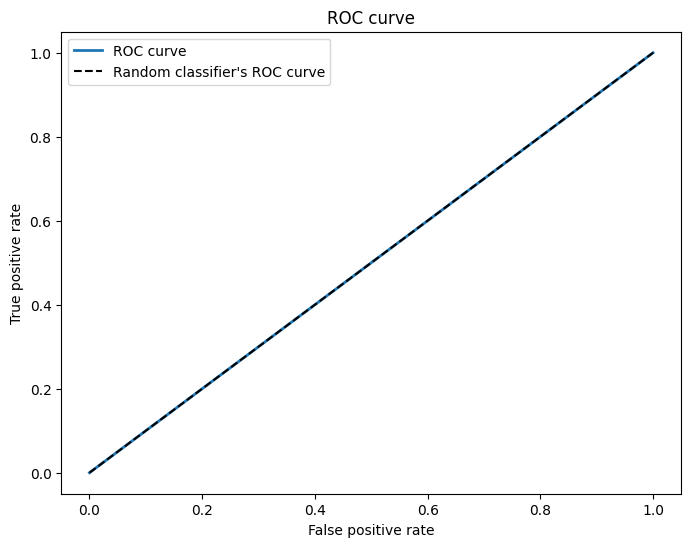

----------------------------------------------------------------------------------------------------
The AUC score is: 0.5
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8616383488953518
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 1.0
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.0
----------------------------------------------------------------------------------------------------
The recall score is: 0.0
----------------------------------------------------------------------------------------------------
The precision score is: 0.0
----------------------------------------------------------------------------------------------------


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


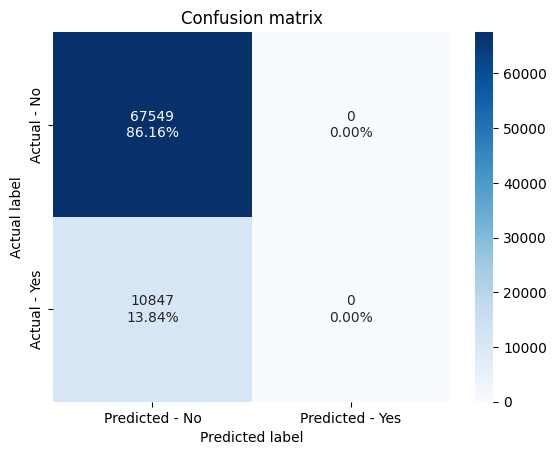

In [115]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
evaluation_metric(dummy, X, y, XX, yy)

Observe:

- the model does not detect any positives, so it is not really a classifier
- Accuracy 86% means it is very bad because 86% is the number of lower risk patients in the dataset (the dummy classifier guesses randomly)

Note: All subsequent models should have performance metrics as far as possible (higher) than the random classifier. Anything performing simillar to the Dummy Classifier is clearly a bad model

## <a id='section5_2'></a> SGD Classifier(Logistic Regression)

In [116]:
from sklearn.linear_model import SGDClassifier

In the following, I will use Bayesian optimization to find the best parameters for the model.

In [117]:
## define search model
def opt_model(search_space,X = X, y= y):

    opt = BayesSearchCV(
        SGDClassifier(),
        search_space,
        n_iter=32,
        scoring = 'recall',
        random_state=1923
    )

    opt.fit(X, y)

    print("val. score: %s" % opt.best_score_)
    print("test score: %s" % opt.score(X, y))
    print("Best parameters: ", opt.best_params_)

    return opt


Note:

- The 'log_loss' parameter ensures we are implementing a logistic regression model

In [118]:
search_space_1 = {
    'eta0': (0.01, 1.0, 'log-uniform'),
    'loss': ['log_loss'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}

In [119]:
## now, let us start searching again
opt_model(search_space_1)

val. score: 0.6185667523951113
test score: 0.5605798704740833
Best parameters:  OrderedDict([('eta0', 0.9996118034011983), ('learning_rate', 'optimal'), ('loss', 'log_loss')])


BayesSearchCV(estimator=SGDClassifier(), n_iter=32, random_state=1923,
              scoring='recall',
              search_spaces={'eta0': (0.01, 1.0, 'log-uniform'),
                             'learning_rate': ['constant', 'optimal',
                                               'invscaling', 'adaptive'],
                             'loss': ['log_loss']})

Observe:

- It seems the 'constant' learning rate schedule is best suited
- eta0 is the initial learning rate( in this case, it is constant).

In [120]:
search_space_2 = {
    'eta0': [0.01],
    'loss': ['log_loss'],
    'learning_rate': ['constant'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
}

In [121]:
import warnings

In [122]:
opt_model(search_space_2)

/opt/homebrew/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 'constant', 'log_loss', 'l2'] before, using random point [0.01, 'constant', 'log_loss', None]
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 'constant', 'log_loss', 'l2'] before, using random point [0.01, 'constant', 'log_loss', 'l1']
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 'constant', 'log_loss', 'l1'] before, using random point [0.01, 'constant', 'log_loss', 'elasticnet']
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 'constant', 'log_loss', 'l1'] before, using random point [0.01, 'constant', 'log_loss', 'l2']
  warning

val. score: 0.6316347947541299
test score: 0.6908202539814239
Best parameters:  OrderedDict([('eta0', 0.01), ('learning_rate', 'constant'), ('loss', 'log_loss'), ('penalty', 'l1')])


BayesSearchCV(estimator=SGDClassifier(), n_iter=32, random_state=1923,
              scoring='recall',
              search_spaces={'eta0': [0.01], 'learning_rate': ['constant'],
                             'loss': ['log_loss'],
                             'penalty': ['l1', 'l2', 'elasticnet', None]})

Observe:

- It seems the model would not benefit l1 regulsarisation. We can search for a regularisation parameters
- We can also see if using the 'balanced' option for class weights helps (effectively atributing weights to the classes based on existing imbalance).

In [123]:
search_space_3 = {
    'eta0': [0.01],
    'loss': ['log_loss'],
    'learning_rate': ['constant'],
    'penalty': ['l1'],
    'alpha' : (0.0001, 0.1, 'uniform'),
    'class_weight': ['balanced', None],
}

In [124]:
opt_model(search_space_3)
warnings.filterwarnings('ignore')

val. score: 0.9146786532613724
test score: 0.9142178893267879
Best parameters:  OrderedDict([('alpha', 0.03457790150741007), ('class_weight', 'balanced'), ('eta0', 0.01), ('learning_rate', 'constant'), ('loss', 'log_loss'), ('penalty', 'l1')])


It seems we have a good choice of hyperparameters, so we could try to create an instance of the SGD-based Logistic Regression class and test it.

In [125]:
sgd_clf = SGDClassifier( alpha = 0.03 ,eta0=0.01, loss='log_loss', learning_rate='constant', penalty='l1', class_weight='balanced', random_state=42)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8480657897027772
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8438696379597823


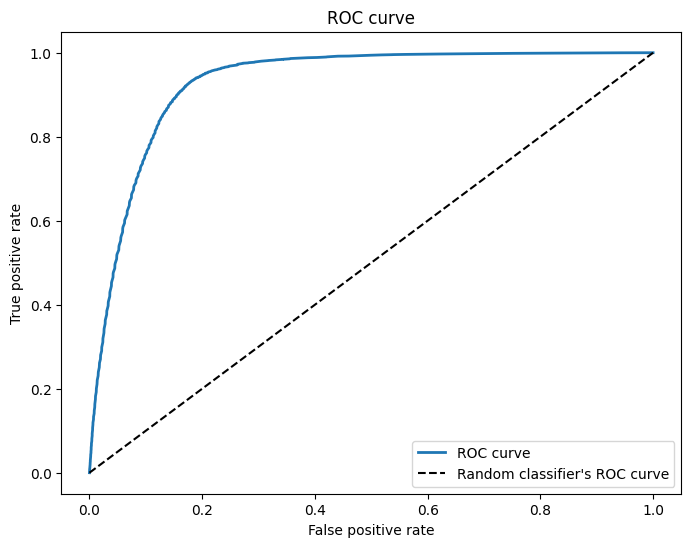

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9293518340447773
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8485126792183275
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.838902130305408
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9083617590117083
----------------------------------------------------------------------------------------------------
The recall score is: 0.9083617590117083
----------------------------------------------------------------------------------------------------
The precision score is: 0.4751868820834338
----------------------------------------------------------------------------------------------------


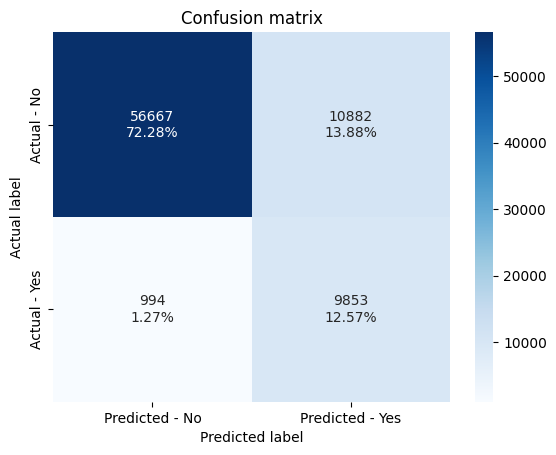

In [126]:
# fit and evaluate the model
evaluation_metric(sgd_clf, X, y, XX, yy)

Observe:

- The recall is quite good, at almost 90%
- Accuracy however is just 85%, which is because the  model misclassifies some lower-risk patients as higher risk - this explains the lower accuracy
- Just under 10% of high risk patients in the sample are False Negatives : high risk patients that are misclassified as low risk

## <a id='section5_3'></a>RandomForest Classifer

Let's try a RandomForest Classifier and evaluate its performance. The documentation for RandomForestClassifier can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier).

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
def opt_model_rf(search_space, n_iter, X = X, y= y):

    opt = BayesSearchCV(
        RandomForestClassifier(),
        search_space,
        n_iter=n_iter,
        scoring = 'recall',
        random_state=1923
    )

    opt.fit(X, y)

    print("val. score: %s" % opt.best_score_)
    print("test score: %s" % opt.score(X, y))
    print("Best parameters: ", opt.best_params_)

    return opt

In [129]:
search_space = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 100)
}

In [130]:
opt_model_rf(search_space, 3)

KeyboardInterrupt: 

OBserve:

- About 440 estimators
- Max depth should be close to 53

We can try to find the optimal number of maximum features when looking for the best script.

In [ ]:
search_space_1 = {
    'n_estimators': [441],
    'max_depth': [53],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
opt_model_rf(search_space_1, 3)

val. score: 0.5797092115664847
test score: 0.730507732374565
Best parameters:  OrderedDict([('max_depth', 53), ('max_features', 'sqrt'), ('n_estimators', 441)])


BayesSearchCV(estimator=RandomForestClassifier(), n_iter=3, random_state=1923,
              scoring='recall',
              search_spaces={'max_depth': [53],
                             'max_features': ['sqrt', 'log2'],
                             'n_estimators': [441]})

We got max_features as sqrt, the square root of n_features. 

In [ ]:
search_space_2 = {
    'n_estimators': [441],
    'max_depth': [53],
    'max_features': ['sqrt'],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
}

In [ ]:
opt_model_rf(search_space_2, 3)

val. score: 0.5842956784847864
test score: 0.6412915715964876
Best parameters:  OrderedDict([('criterion', 'entropy'), ('max_depth', 53), ('max_features', 'sqrt'), ('min_samples_leaf', 2), ('min_samples_split', 7), ('n_estimators', 441)])


BayesSearchCV(estimator=RandomForestClassifier(), n_iter=3, random_state=1923,
              scoring='recall',
              search_spaces={'criterion': ['gini', 'entropy', 'log_loss'],
                             'max_depth': [53], 'max_features': ['sqrt'],
                             'min_samples_leaf': (1, 10),
                             'min_samples_split': (2, 10),
                             'n_estimators': [441]})

Now, we can test the model. As before, I will make sure the classes are attributed balanced weights.

In [ ]:
##Let's instantiate the random forest classifier with the best parameters found by the hyperparameter search
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=53, max_features='sqrt', min_samples_leaf=2, min_samples_split=7, n_estimators=441, class_weight='balanced', random_state=38)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8695369341400724
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8701082121412886


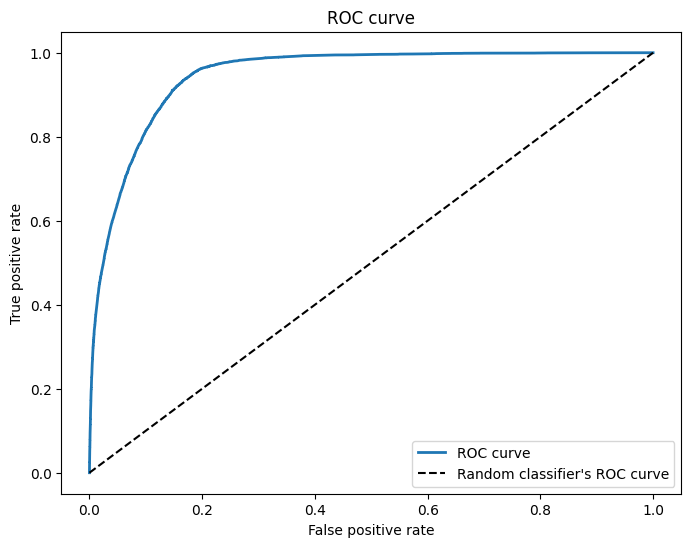

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9463122811681977
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8666386040104087
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8626034434262535
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.8917673089333457
----------------------------------------------------------------------------------------------------
The recall score is: 0.8917673089333457
----------------------------------------------------------------------------------------------------
The precision score is: 0.5103408251556399
----------------------------------------------------------------------------------------------------


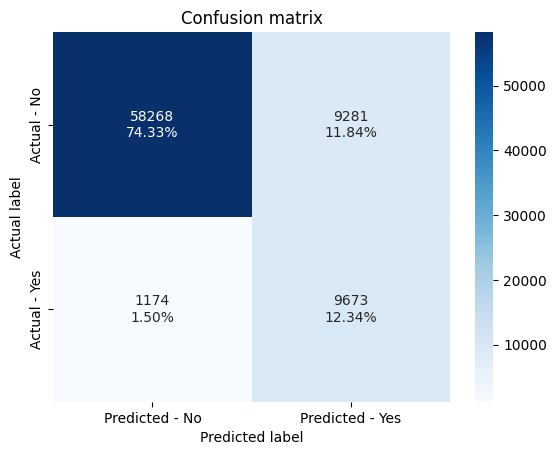

In [ ]:
##Let's fit the model to the training data and the evaluate it on the validation set
evaluation_metric(rf_clf, X, y, XX, yy)

Observe :

- We have 89% recall, and 86% accuracy
- The model performs slightly worse than logistic regression

## <a id='section5_6'></a>MultiLayer Perceptron

Let us train an MLP model to see if it performs better than the previous ones

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# define opt function
def opt_model_mlp(search_space, n_iter, X = X, y= y):

    opt = BayesSearchCV(
        MLPClassifier(),
        search_space,
        n_iter=n_iter,
        scoring = 'recall',
        random_state=48
    )

    opt.fit(X, y)

    print("val. score: %s" % opt.best_score_)
    print("test score: %s" % opt.score(X, y))
    print("Best parameters: ", opt.best_params_)

    return opt

In [ ]:
search_space = {
    'activation': ['identity', 'relu', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': (0.0001, 0.1, 'uniform'),
    'learning_rate': ['constant',  'adaptive']}

In [ ]:
opt_model_mlp(search_space, 3)

val. score: 0.5897347436432295
test score: 0.5907949019336698
Best parameters:  OrderedDict([('activation', 'identity'), ('alpha', 0.01859129803944326), ('learning_rate', 'adaptive'), ('solver', 'sgd')])


BayesSearchCV(estimator=MLPClassifier(), n_iter=3, random_state=48,
              scoring='recall',
              search_spaces={'activation': ['identity', 'relu', 'logistic',
                                            'tanh'],
                             'alpha': (0.0001, 0.1, 'uniform'),
                             'learning_rate': ['constant', 'adaptive'],
                             'solver': ['adam', 'sgd']})

Let's use these hyperparams to instantiate, train and evaluate the model

In [ ]:
##instantiating the model with the best parameters found by the hyperparameter search
mlp_clf = MLPClassifier(activation= 'relu', alpha= 0.01, learning_rate= 'adaptive', solver= 'adam', random_state=1923)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.9141567044690572
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.9120108350438842


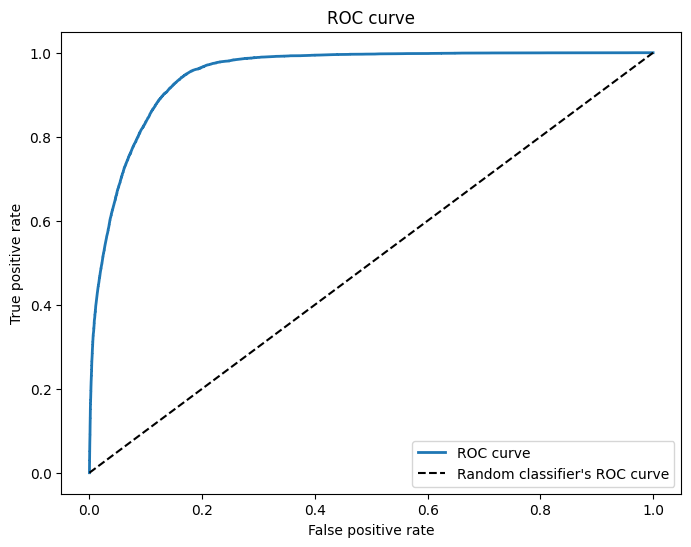

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9509310043990574
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.9135797744782898
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.9629898296051755
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.6058818106388864
----------------------------------------------------------------------------------------------------
The recall score is: 0.6058818106388864
----------------------------------------------------------------------------------------------------
The precision score is: 0.7244268077601411
----------------------------------------------------------------------------------------------------


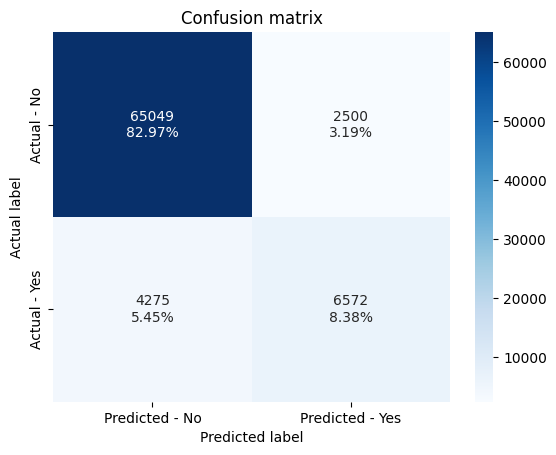

In [ ]:
##fit and evaluate the model
evaluation_metric(mlp_clf, X, y, XX, yy)

Observe:

- Results look worse than before, but this is because we have no hyperparameter that assigns weights to the classes
- It is worth experimenting with SMOTE techniques to understand if this model can be improved

<a id='section5_7'></a>
## XGBoost

I'll try the XGBoost library, which is based on using parallel trees. The [documentation](https://xgboost.readthedocs.io/en/stable/get_started.html) explains the meaning of hyper-parameters and the inner workings of this algorithm.

In [ ]:
##import the XGBoost classifier
from xgboost import XGBClassifier

As before, let's run a parameter search with BayesCV and see what is the best performance obtained with XGBoost

In [ ]:
def opt_model_xgb(search_space, n_iter, X = X, y = y):
    # Calculate scale_pos_weight for binary classification
    scale_pos_weight = sum(y == 0) / sum(y == 1)
    
    print(f"scale_pos_weight: {scale_pos_weight}")
    
    try:
        opt = BayesSearchCV(
            XGBClassifier(scale_pos_weight=scale_pos_weight),
            search_space,
            n_iter=n_iter,
            scoring='recall',
            random_state=1923,
            refit=True  # Ensure refit is set to True
        )

        opt.fit(X, y)

        print("val. score: %s" % opt.best_score_)
        print("Best parameters: ", opt.best_params_)

        return opt
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
search_space =  {'n_estimators': [100, 200, 300, 400, 500],
        'eta': [0.01, 0.1, 1.0], 
         'gamma': [0, 10, 100], 
        'max_depth': [3, 5, 7, 9], 
        'sampling_method': ['uniform'],
        'lambda' : [0.01, 0.1, 0.5, 1.0], ##L2 regularization term on weights
        'alpha' : [0.01, 0.1, 0.5, 1.0], ##L1 regularization term on weights
        'grow_policy' : ['depthwise', 'lossguide']
         } 


In [ ]:
opt_model_xgb(search_space, 3)

scale_pos_weight: 6.22724653714075
val. score: 0.9378184248541077
Best parameters:  OrderedDict([('alpha', 0.5), ('eta', 0.1), ('gamma', 100), ('grow_policy', 'depthwise'), ('lambda', 0.5), ('max_depth', 9), ('n_estimators', 500), ('sampling_method', 'uniform')])


BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=None, ...),
              n_iter=3, random_state=1923, scoring='recall',
              search_spaces={'alpha': [0.01, 0.1, 0.5, 1.0],
                             'eta': [0.01, 0.1, 1.0], 'gamma': [0, 10, 100],
                             'grow_policy': ['depthwise', 'lossguide'],
                             'lambda': [0.01, 0.1, 0.5, 1.0],
                             'max_depth': [3, 5, 7, 9],
                             'n_estimators': [100, 200, 300, 400, 500],
                             'sampling_method': ['uniform']})

In [ ]:
##create model instance with the best parameters
xgb_clf = XGBClassifier(n_estimators=500,  eta = 0.1, max_depth=9, learning_rate=0.001, objective='binary:logistic', sampling_method='uniform', grow_policy='depthwise', alpha=0.5, gamma=100, scale_pos_weight = 6.22,   random_state=1923)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8486652752765556
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8575820486846439


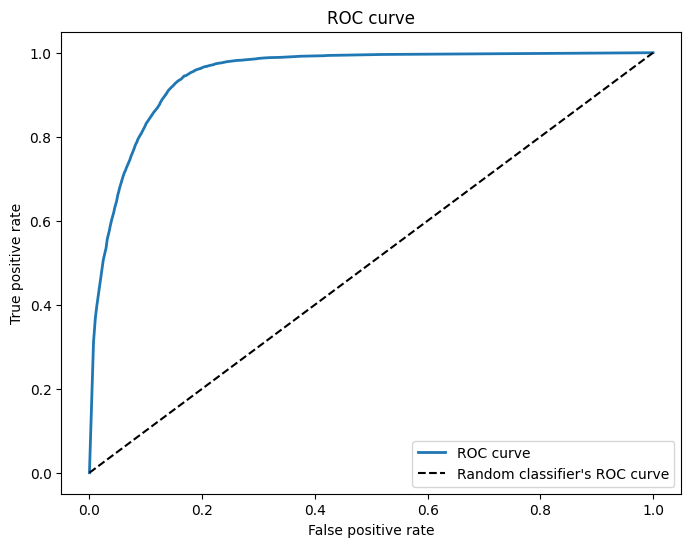

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9474781837652932
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.851255166079902
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8374809397622467
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.937033281091546
----------------------------------------------------------------------------------------------------
The recall score is: 0.937033281091546
----------------------------------------------------------------------------------------------------
The precision score is: 0.48074921956295524
----------------------------------------------------------------------------------------------------


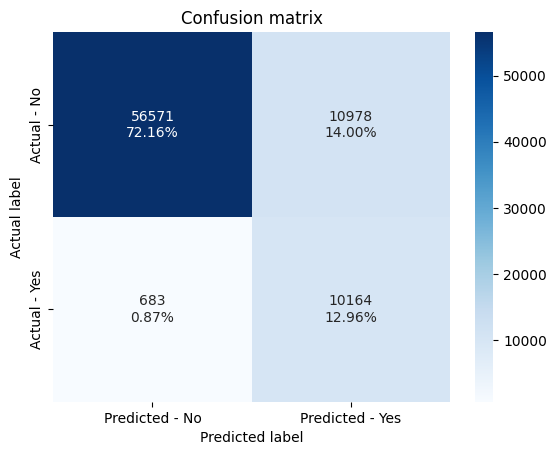

In [ ]:
##evaluate the model
evaluation_metric(xgb_clf, X, y, XX, yy)

Observe :

- Taking into account recall, XGBoost performs the best so far, with 93%
- Accuracy is quite low due to misclassified instances
- But only 683 patients (from over 10_000) that are actually High Risk are misclassified

# <a id='section6'></a>6. Voting Classifier

In this section, I will attempt an alternative way of ensemble learning, which is the voting classifier. The aim is to combine several "weaker" learners to see if I can obtain a significantly stronger learner. To maximise the performance of the voting classifiers, I will select the top 3 performing models: Random Forest, Logistic Regression and XGBoosting. There are two main options forvoting classifiers : (i) a hard voting one (majority wins) and a soft voting classifier (combines probabilities). As hard voting has no predict_proba method, the evaluation metric I chose will not be able to evaluate the recall, which is crucial for this model. Hence, I will use a soft voting approach

## <a id='section6_1'></a>Soft Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
##creates an instance of the voting classifier with soft voting
voting_soft = VotingClassifier(estimators=[
                                            ('log', sgd_clf), 
                                           ('rf', rf_clf),
                                            ('xgb', xgb_clf),
                                            ], 
                                            voting='soft')

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8589496466685933
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.859099979857368


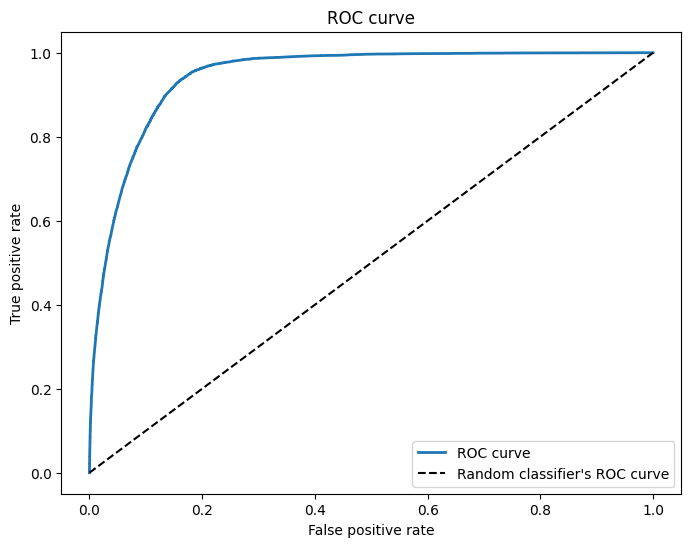

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9455787489399045
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8583983876728405
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8480214362906927
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.923020189914262
----------------------------------------------------------------------------------------------------
The recall score is: 0.923020189914262
----------------------------------------------------------------------------------------------------
The precision score is: 0.49373705493638426
----------------------------------------------------------------------------------------------------


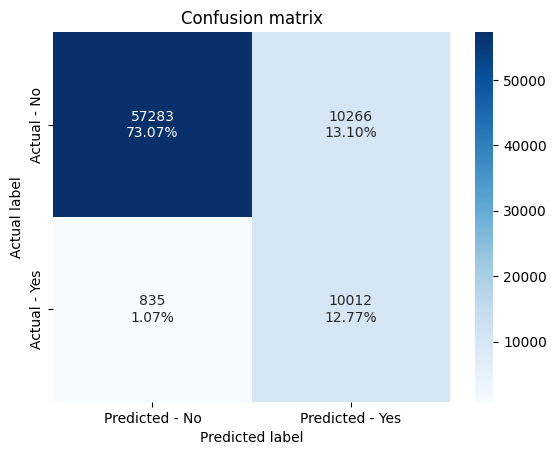

In [ ]:
evaluation_metric(voting_soft, X, y, XX, yy)

Observe: 

- The FN have increased slightly
- It it likely that the random forest and logistic regression weight it down

In [ ]:
##creates an instance of the voting classifier with soft voting
voting_soft_rf = VotingClassifier(estimators=[
                                           ('xgb', xgb_clf),
                                           ('rf', rf_clf)
                                            ],
                                            voting='soft') 

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8651648861847245
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8650441771197924


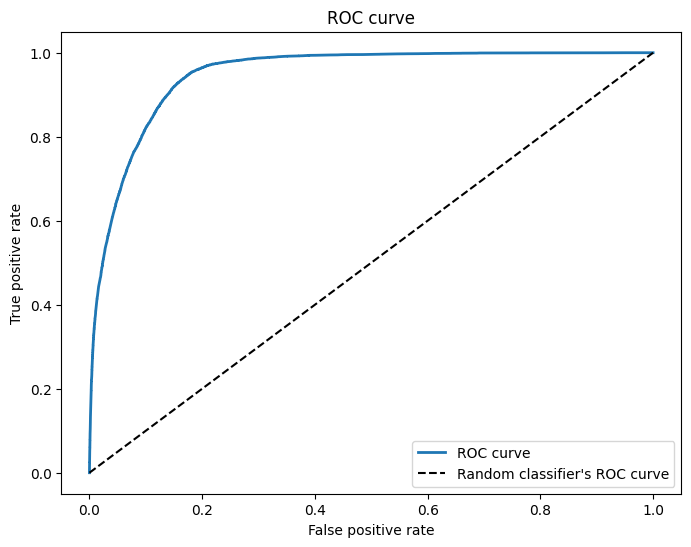

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9480531587869596
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.863653757844788
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8564153429362389
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9087305245690053
----------------------------------------------------------------------------------------------------
The recall score is: 0.9087305245690053
----------------------------------------------------------------------------------------------------
The precision score is: 0.5040396809163428
----------------------------------------------------------------------------------------------------


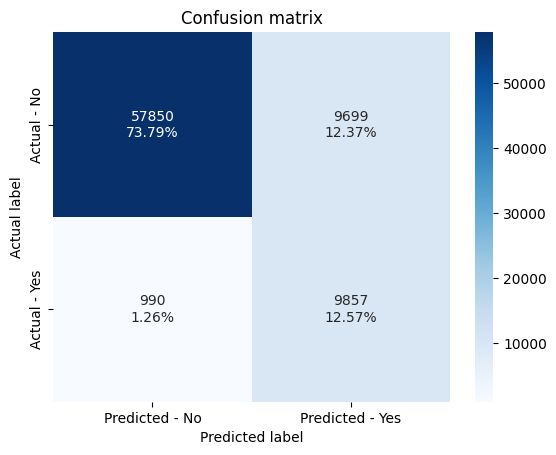

In [ ]:
evaluation_metric(voting_soft_rf, X, y, XX, yy)

<a id='section7'></a>
# 7. Undersampling methods

The previous experiements showed that XGBoost, Random Forest and Logistic Regression gave pretty good performance, especially when adjusting for the imbalanced classes. However, the performance must be siginificantly improved if this classifier should be used. The purpose of this section is to experiement with different undersampling techniques that can create a training set with balanced classes. We could also test the MLP classifier, as it doesn't have the option to adjust the balance weights. 

<a id='section7_1'></a>
## 7.1 Random Undersampling

I will use the imbalance learn library in the following. 

In [ ]:
## import imblearn library
import imblearn

In [ ]:
print(imblearn.__version__)

0.11.0


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

##create an instance of the random under sampler
rus = RandomUnderSampler(random_state=1923)

In [ ]:
##resample the training data with the random under sampler
X_rus, y_rus = rus.fit_resample(X, y)

##let's check the new shape of the resampled data
print(X_rus.shape, y_rus.shape)

##let's check the new class distribution
print(pd.Series(y_rus).value_counts()/len(y_rus))

(86778, 51) (86778,)
Higher_Risk
0    0.5
1    0.5
Name: count, dtype: float64


In the above, I undersampled the training set such that the proportions are balanced (50/50 cases og high risk and lower risk). While this eliminates some instances, thus introducing bias, it ensures the classes are balanced and all the data is real data.

### MLP

In [ ]:

##define the classifier model with the best parameters found by the hyperparameter search
mlp_rus = MLPClassifier(activation= 'relu', alpha= 0.04, learning_rate= 'constant', solver= 'adam', random_state=1923)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8902141584812732
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.9128144479617217


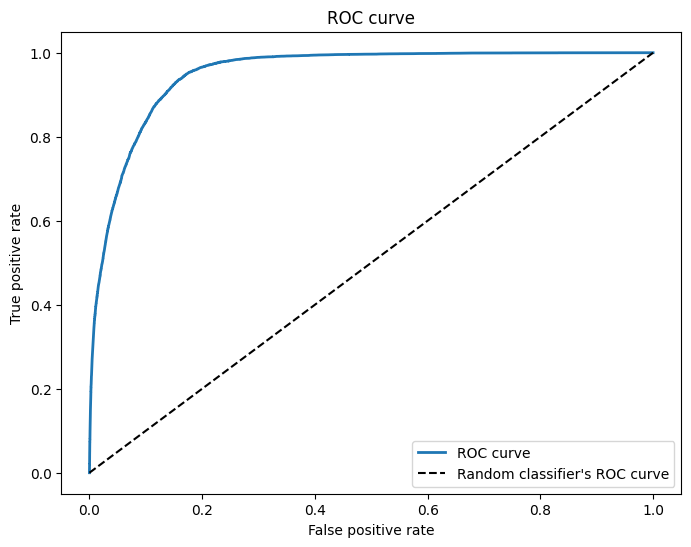

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9506823050617346
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8538956069187204
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8406786184843595
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9362035585876279
----------------------------------------------------------------------------------------------------
The recall score is: 0.9362035585876279
----------------------------------------------------------------------------------------------------
The precision score is: 0.4854902710713773
----------------------------------------------------------------------------------------------------


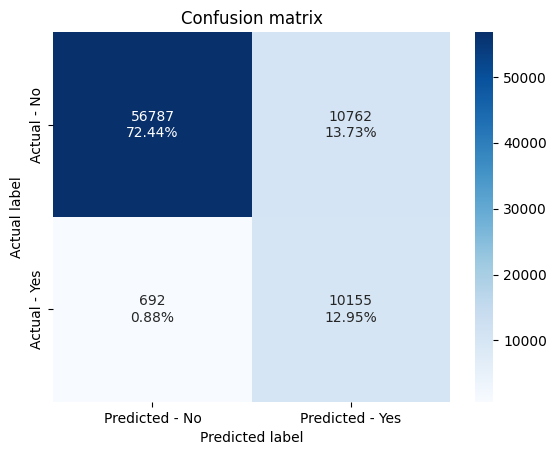

In [ ]:
##evaluate the model on the original test set
evaluation_metric(mlp_rus, X_rus, y_rus, XX, yy)

Observe :

- The accuracy score is close to 85%, which is not better than the random classifier
- However, the recall has definitely increased at 93.62% : there are only 692 misclassified High Risk patients, a significant improvement
- The con of using this method, is the large number of False Positives (10663), which is the cost of having reduced the number of misclassified patients
- In sum, although the accuracy is bad, this classifier is far better fit for purpose due to high recall
- Comparing it to the XGBoost Model, it performs only marginally better.


### XGBoost

Let's also test XGBoost on the random undersamples datA

In [ ]:
xgb_rus = XGBClassifier(n_estimators=500,  eta = 0.1, max_depth=9, learning_rate=0.001, objective='binary:logistic', sampling_method='uniform', grow_policy='depthwise', alpha=0.5, gamma=100, scale_pos_weight =1.0,   random_state=1923) #changed scale_pos_weight to 1

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8840489914491846
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8616383492934133


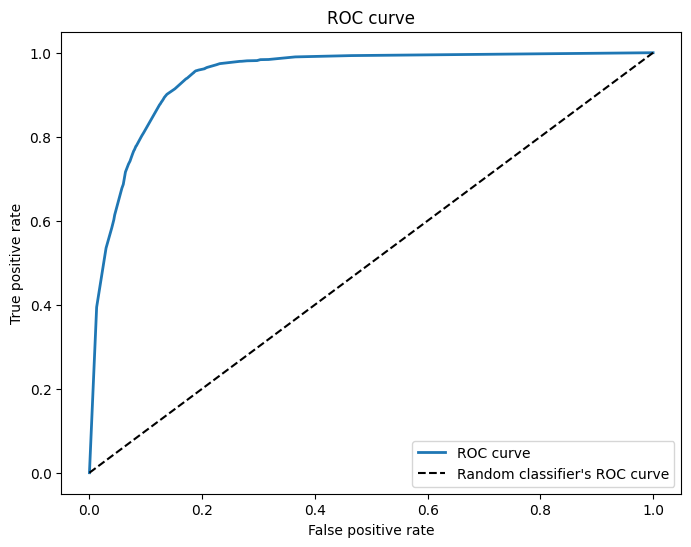

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9441775753475719
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8434614010918925
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8282432012316985
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9382317691527612
----------------------------------------------------------------------------------------------------
The recall score is: 0.9382317691527612
----------------------------------------------------------------------------------------------------
The precision score is: 0.46728499931126316
----------------------------------------------------------------------------------------------------


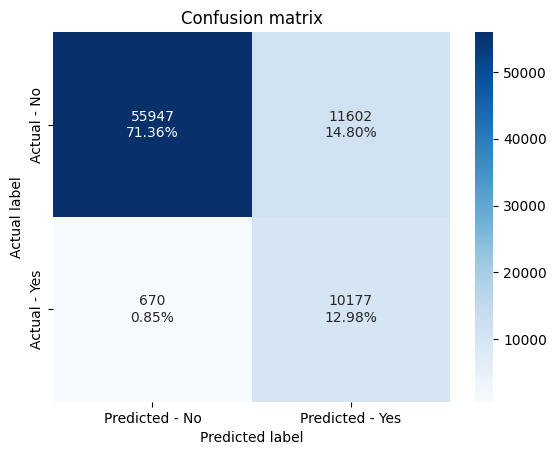

In [ ]:
evaluation_metric(xgb_rus, X_rus, y_rus, XX, yy)

### Log-Reg

In [ ]:
log_rus = SGDClassifier( alpha = 0.03 ,eta0=0.01, loss='log_loss', learning_rate='constant', penalty='l1', class_weight='balanced', random_state=42)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8720413176864852
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8438696379597823


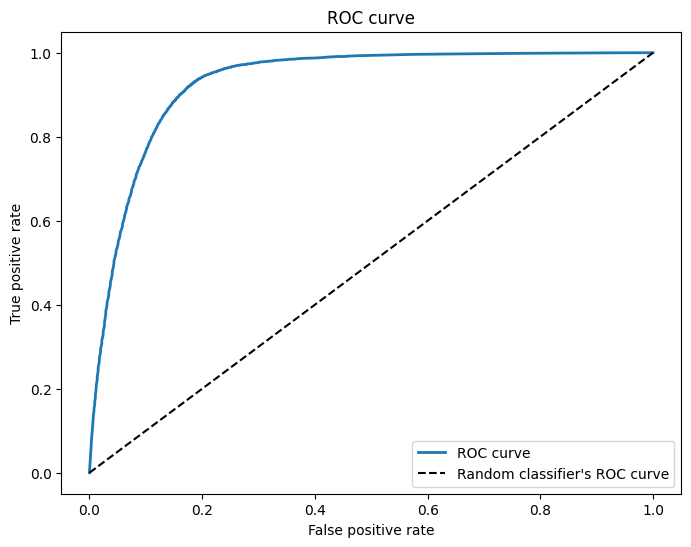

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9297175929309069
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8484489004541048
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8402937127122533
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.8992348114686088
----------------------------------------------------------------------------------------------------
The recall score is: 0.8992348114686088
----------------------------------------------------------------------------------------------------
The precision score is: 0.47483205140687373
----------------------------------------------------------------------------------------------------


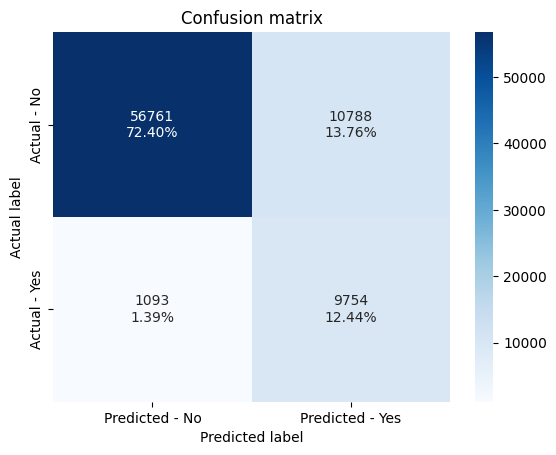

In [ ]:
evaluation_metric(log_rus, X_rus, y_rus, XX, yy)

### Voting

In [ ]:
voting_soft_rus = VotingClassifier(estimators=[
                                           ('xgb', xgb_rus),
                                           ('mlp', mlp_rus),
                                             ('log', log_rus)

                                            ],
                                            voting='soft')

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8876904644806947
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.9091025635810801


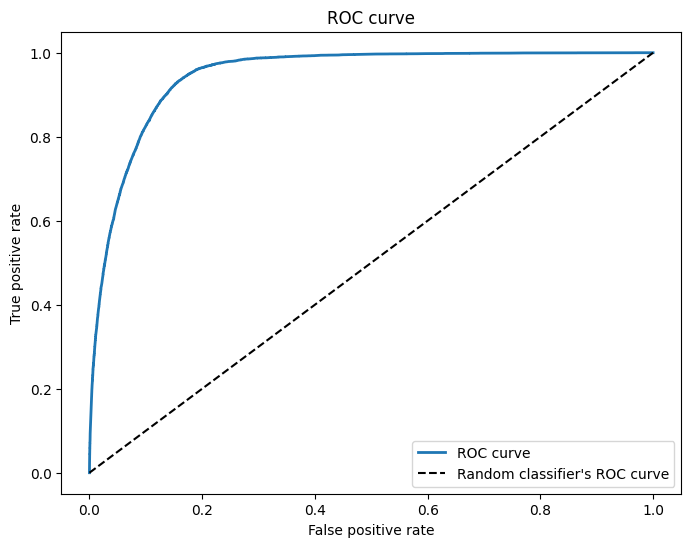

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9466622328525751
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8533088422878718
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.840367733053043
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.933898773854522
----------------------------------------------------------------------------------------------------
The recall score is: 0.933898773854522
----------------------------------------------------------------------------------------------------
The precision score is: 0.4843877014297327
----------------------------------------------------------------------------------------------------


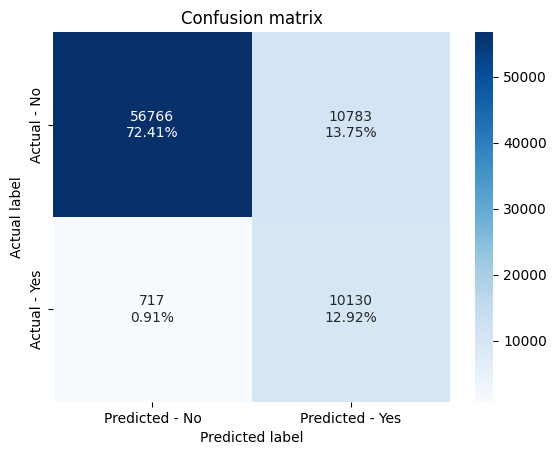

In [ ]:
evaluation_metric(voting_soft_rus, X_rus, y_rus, XX, yy)

Observe:

- We worse results with the voting classifier

<a id='section7_2'></a>
## Near-Miss 

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
##create an instance of the NearMiss algorithm
nm1 = NearMiss(version=1)

In [ ]:
## resample the training data with the NearMiss-1
X_nm1, y_nm1 = nm1.fit_resample(X, y)

print(X_nm1.shape, y_nm1.shape)

print(pd.Series(y_nm1).value_counts()/len(y_nm1))

(86778, 51) (86778,)
Higher_Risk
0    0.5
1    0.5
Name: count, dtype: float64


### MLP

In [ ]:
##define the classifier model with the best parameters found by the hyperparameter search
mlp_nm1 = MLPClassifier(activation= 'relu', alpha= 0.04, learning_rate= 'adaptive', solver= 'adam', random_state=1923)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8285395336687899
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.9128144479617217


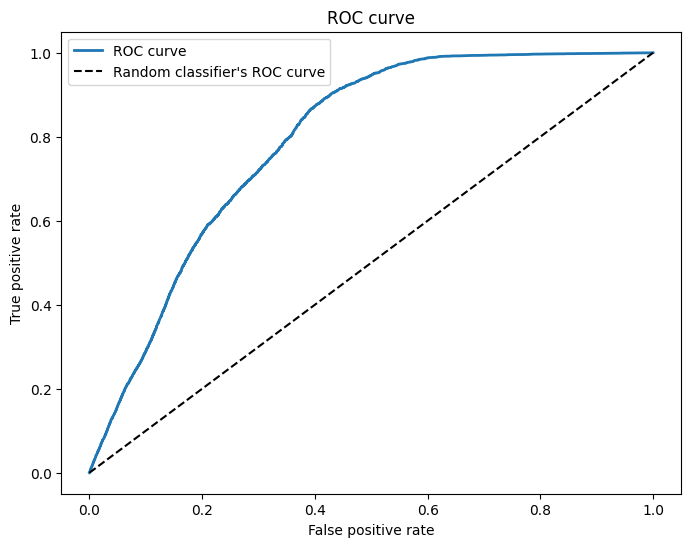

----------------------------------------------------------------------------------------------------
The AUC score is: 0.7905192275850033
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.6724322669523956
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.6538512783312854
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.7881441873329031
----------------------------------------------------------------------------------------------------
The recall score is: 0.7881441873329031
----------------------------------------------------------------------------------------------------
The precision score is: 0.267733550468197
----------------------------------------------------------------------------------------------------


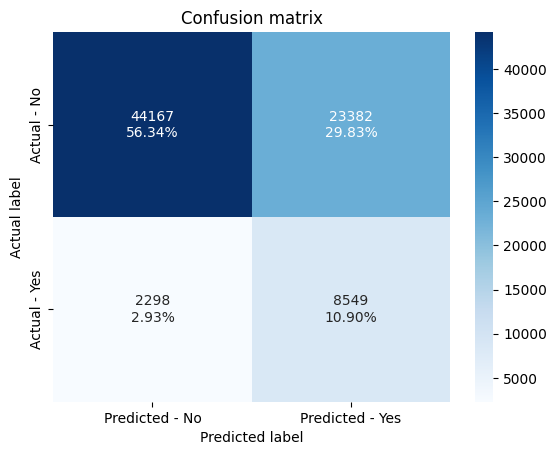

In [ ]:
##evaluate the model on the original test set
evaluation_metric(mlp_nm1, X_nm1, y_nm1, XX, yy)

Observe:

- Very bad performance compared to random undersampling
- About 2300 patients high risk patients are misclassified
- Also, a very high number of FP : near 30000. This means most FP predictions are actually false

Note: Undersampling the majority class means removing many relevant information and working with a significantly smaller training set while making predictions on a larger test set. Another possible way to deal with this problem is to oversample the minority class, which will be dealt with in the following section.

### XGBoost

In [ ]:
xgb_nm1 = XGBClassifier(n_estimators=500,  eta = 0.1, max_depth=9, learning_rate=0.001, objective='binary:logistic', sampling_method='uniform', grow_policy='depthwise', alpha=0.5, gamma=100, scale_pos_weight =1.0,   random_state=1923) #changed scale_pos_weight to 1

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.7913293951284632
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8616383492934133


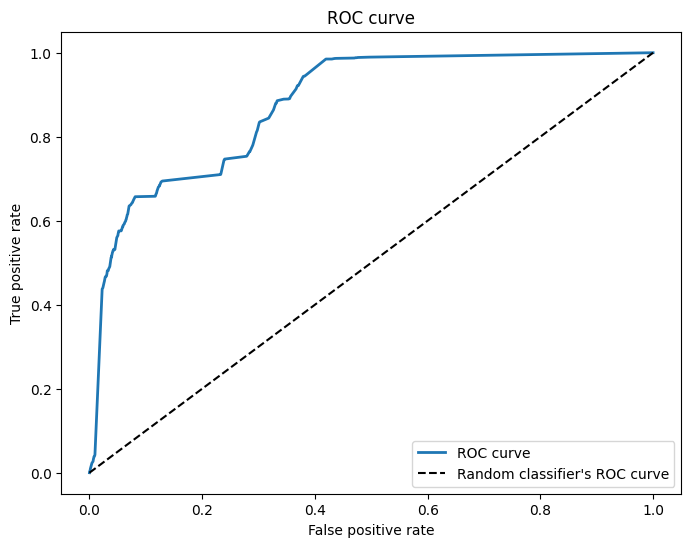

----------------------------------------------------------------------------------------------------
The AUC score is: 0.8770860884733013
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.7171794479310168
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.698233874668759
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.835161795888264
----------------------------------------------------------------------------------------------------
The recall score is: 0.835161795888264
----------------------------------------------------------------------------------------------------
The precision score is: 0.30767924464219
----------------------------------------------------------------------------------------------------


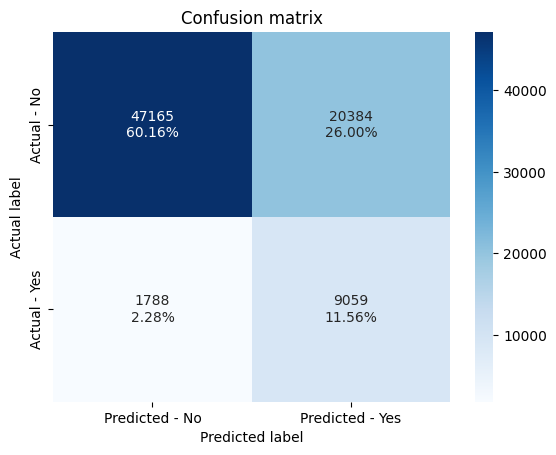

In [ ]:
evaluation_metric(xgb_nm1, X_nm1, y_nm1, XX, yy)

### Log-Reg

In [ ]:
log_nm1 = SGDClassifier( alpha = 0.03 ,eta0=0.01, loss='log_loss', learning_rate='constant', penalty='l1', class_weight='balanced', random_state=456)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.7913293951284632
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8616383492934133


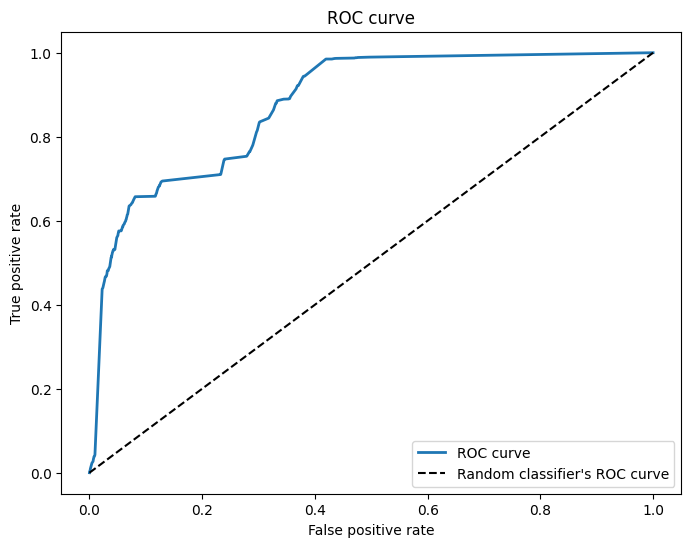

----------------------------------------------------------------------------------------------------
The AUC score is: 0.8770860884733013
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.7171794479310168
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.698233874668759
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.835161795888264
----------------------------------------------------------------------------------------------------
The recall score is: 0.835161795888264
----------------------------------------------------------------------------------------------------
The precision score is: 0.30767924464219
----------------------------------------------------------------------------------------------------


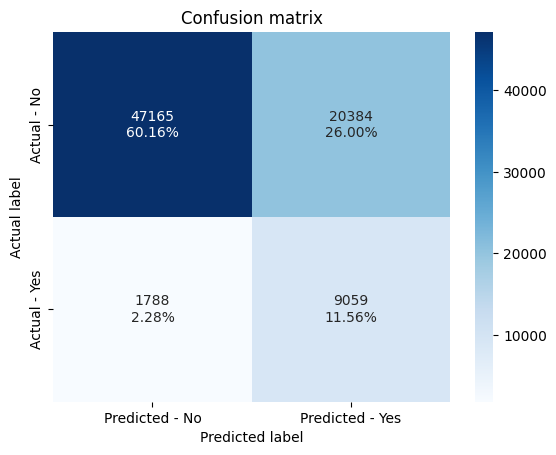

In [ ]:
evaluation_metric(xgb_nm1, X_nm1, y_nm1, XX, yy)

<a id='section8'></a>
# 8. Oversampling methods

<a id='section8_1'></a>
## SMOTE

I will use SMOTE methods in the following, a method  that creates a training set with with balanced classes by augmenting the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=142)

In [ ]:
X_smote, y_smote = smote.fit_resample(X, y)

### MLP

In [ ]:
##define the classifier model with the best parameters found by the hyperparameter search
mlp_smote = MLPClassifier(activation= 'relu', alpha= 0.04, learning_rate= 'constant', solver= 'adam', random_state=1923)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8900493728619476
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.9128144479617217


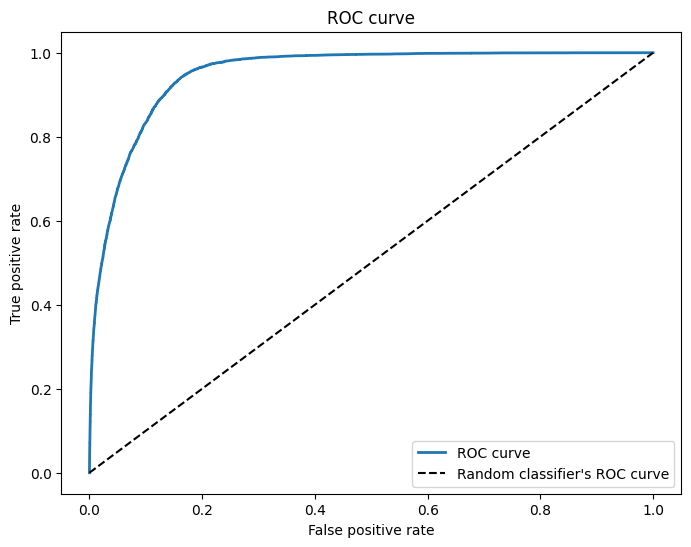

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9506958098330467
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8529771927139139
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8391686035322506
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.938969300267355
----------------------------------------------------------------------------------------------------
The recall score is: 0.938969300267355
----------------------------------------------------------------------------------------------------
The precision score is: 0.4838709677419355
----------------------------------------------------------------------------------------------------


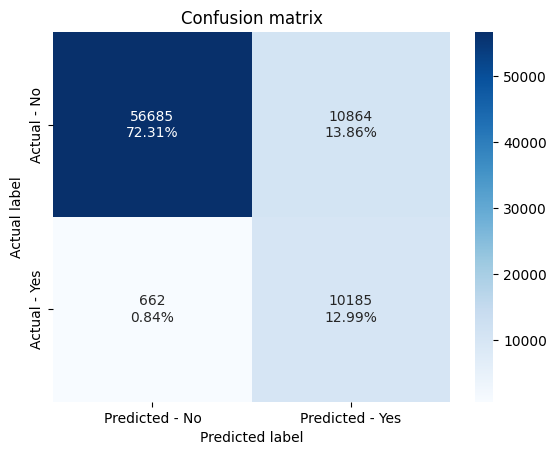

In [ ]:
##evaluate the model on the original test set
evaluation_metric(mlp_smote, X_smote, y_smote, XX, yy)

Observe :

- Recall is at 94% - peak performance

### Log-Reg

In [ ]:
log_smote = SGDClassifier( alpha = 0.03 ,eta0=0.01, loss='log_loss', learning_rate='constant', penalty='l1', class_weight='balanced', random_state=454)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8751471146919142
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8526074490641975


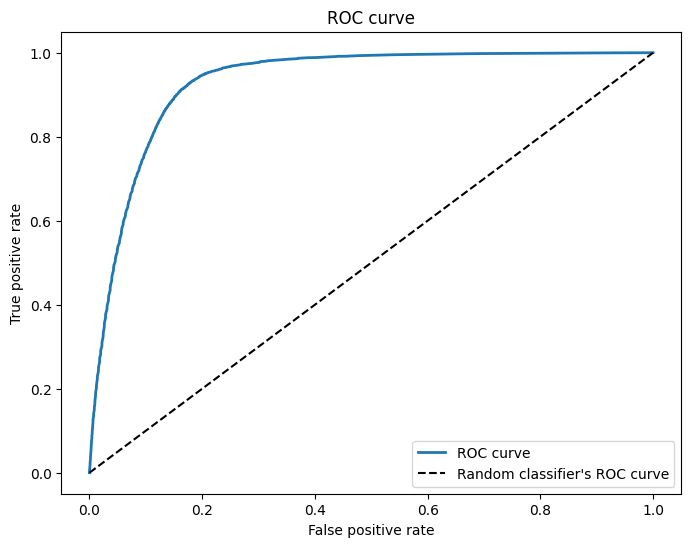

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9301132492925659
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8521608245318639
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8443056151830522
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9010786392550936
----------------------------------------------------------------------------------------------------
The recall score is: 0.9010786392550936
----------------------------------------------------------------------------------------------------
The precision score is: 0.48169139027154895
----------------------------------------------------------------------------------------------------


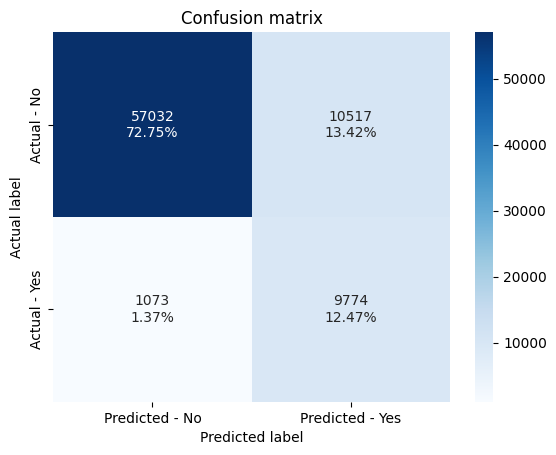

In [ ]:
evaluation_metric(log_smote, X_smote, y_smote, XX, yy)

### XGBoost

In [ ]:
xgb_smote = XGBClassifier(n_estimators=500,  eta = 0.1, max_depth=9, learning_rate=0.001, objective='binary:logistic', sampling_method='uniform', grow_policy='depthwise', alpha=0.5, gamma=100, scale_pos_weight =1.0,   random_state=1945) #changed scale_pos_weight to 1

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8889501631373801
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8616383492934133


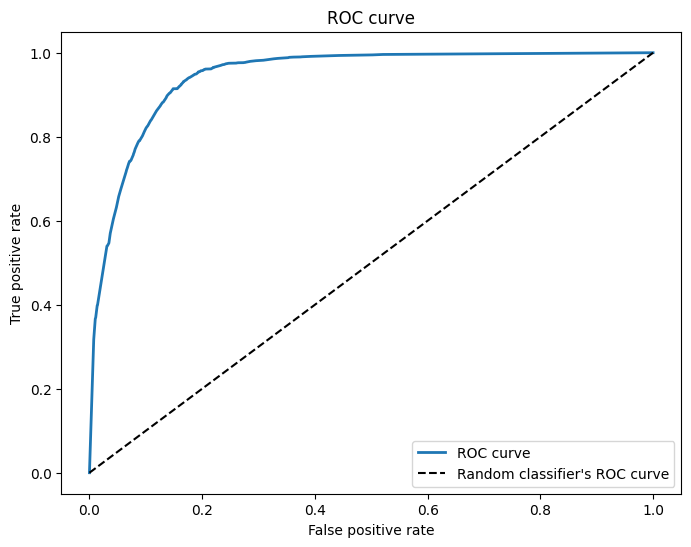

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9445661606409976
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8425812541456197
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8275918222327495
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9359269844196552
----------------------------------------------------------------------------------------------------
The recall score is: 0.9359269844196552
----------------------------------------------------------------------------------------------------
The precision score is: 0.46573080099091657
----------------------------------------------------------------------------------------------------


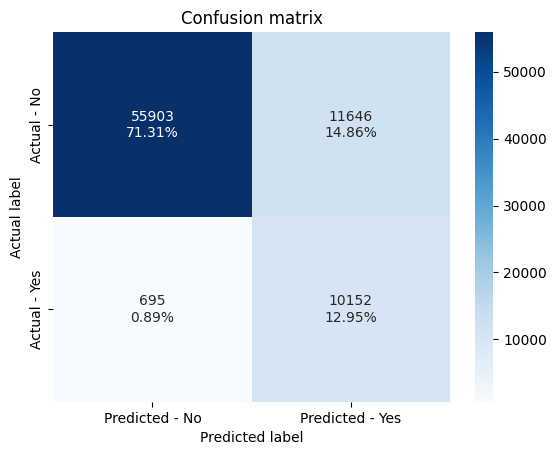

In [ ]:
evaluation_metric(xgb_smote, X_smote, y_smote, XX, yy)

- Very close performance to XGBoost

## Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
##create an instance of the model
ros = RandomOverSampler(random_state=42)

In [ ]:
##transform the training data
X_ros, y_ros = ros.fit_resample(X, y)

### MLP

In [ ]:
##define the classifier model with the best parameters found by the hyperparameter search
mlp_ros = MLPClassifier(activation= 'relu', alpha= 0.01, learning_rate= 'constant', solver= 'adam', random_state=1923)  

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8902288727842063
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.9120108350438842


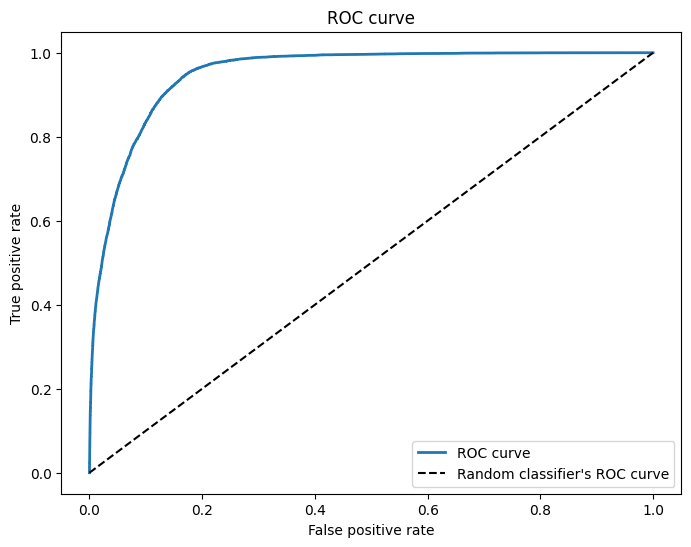

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9507592829406174
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.858053982346038
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8470295637241114
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9267078454872315
----------------------------------------------------------------------------------------------------
The recall score is: 0.9267078454872315
----------------------------------------------------------------------------------------------------
The precision score is: 0.49310767721363746
----------------------------------------------------------------------------------------------------


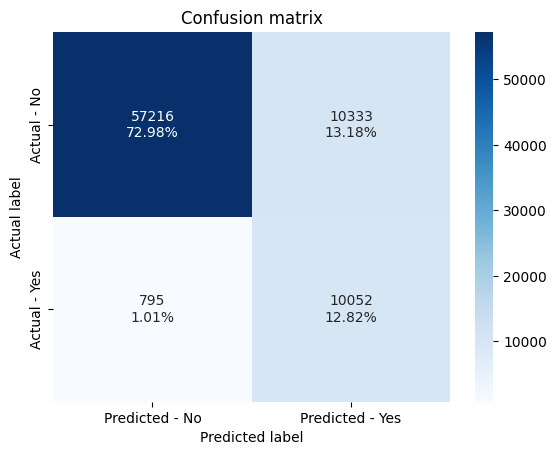

In [ ]:
##evaluate the model on the original test set
evaluation_metric(mlp_ros, X_ros, y_ros, XX, yy)

### XGBoost

In [ ]:
xgb_ros = XGBClassifier(n_estimators=500,  eta = 0.1, max_depth=9, learning_rate=0.01, objective='binary:logistic', sampling_method='uniform', grow_policy='depthwise', alpha=0.5, gamma=100, scale_pos_weight =1.0,   random_state=1924) #changed scale_pos_weight to 1

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.889451653007718
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.91055670948142


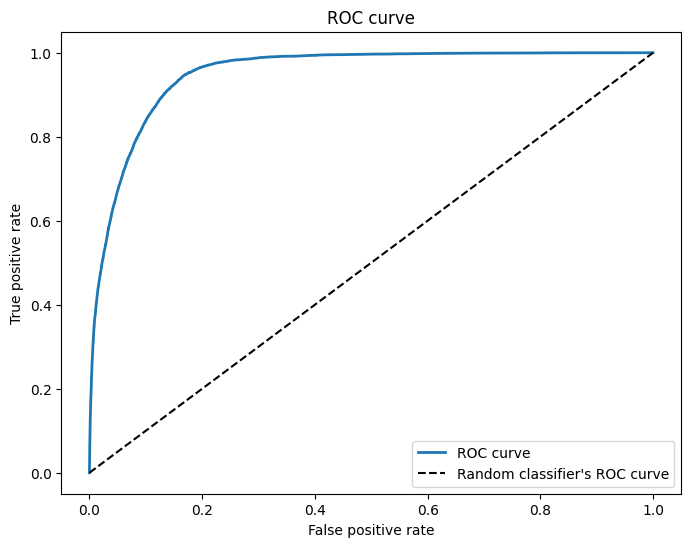

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9504654760293428
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8545078830552579
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8415076463012036
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.935466027473034
----------------------------------------------------------------------------------------------------
The recall score is: 0.935466027473034
----------------------------------------------------------------------------------------------------
The precision score is: 0.48659665275979475
----------------------------------------------------------------------------------------------------


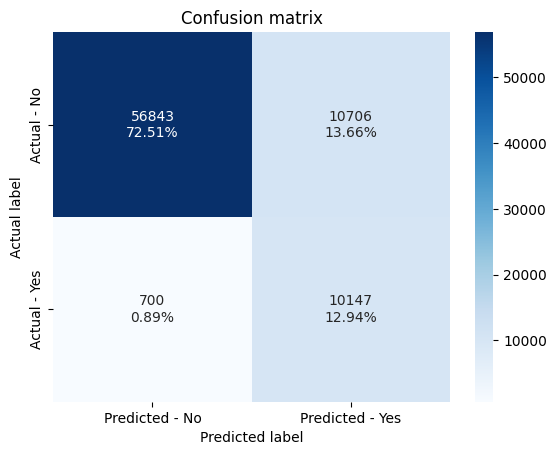

In [ ]:
evaluation_metric(xgb_ros, X_ros, y_ros, XX, yy)

### Log-Reg

In [ ]:
log_ros = SGDClassifier( alpha = 0.03 ,eta0=0.01, loss='log_loss', learning_rate='constant', penalty='l1', class_weight='balanced', random_state=454)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.874902848152899
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8526074490641975


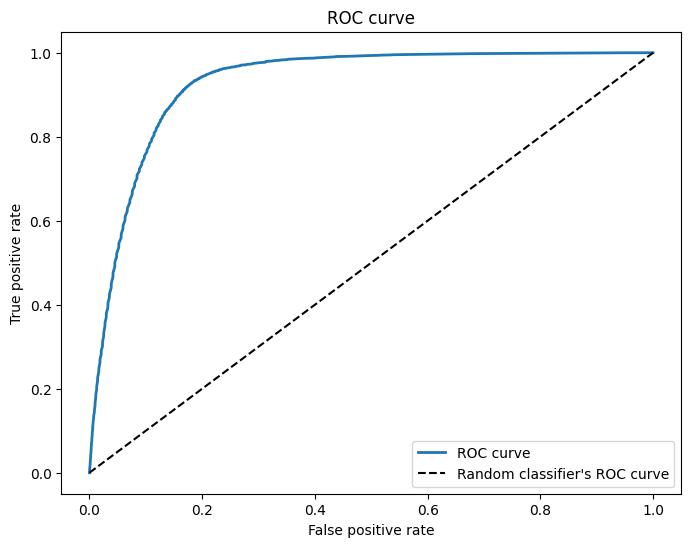

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9285579623071882
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8464207357518241
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8369183851722454
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9055960173319811
----------------------------------------------------------------------------------------------------
The recall score is: 0.9055960173319811
----------------------------------------------------------------------------------------------------
The precision score is: 0.47137578578626615
----------------------------------------------------------------------------------------------------


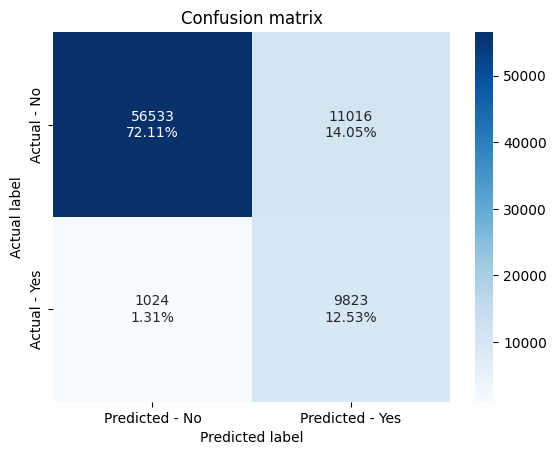

In [ ]:
evaluation_metric(log_ros, X_ros, y_ros, XX, yy)

<a id='section8_3'></a>
## Borderline-SMOTE1

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
##create an instance of the model
bsmote = BorderlineSMOTE(random_state=42)

In [ ]:
##transform the training data
X_bsmote, y_bsmote = bsmote.fit_resample(X, y)

In [ ]:
print(X_bsmote.shape, y_bsmote.shape)

(540388, 51) (540388,)


### MLP

In [ ]:
##define the classifier model with the best parameters found by the hyperparameter search
mlp_bsmote = MLPClassifier(activation= 'relu', alpha= 0.04, learning_rate= 'constant', solver= 'adam', random_state=1918)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8664090040140884
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.9120746178757235


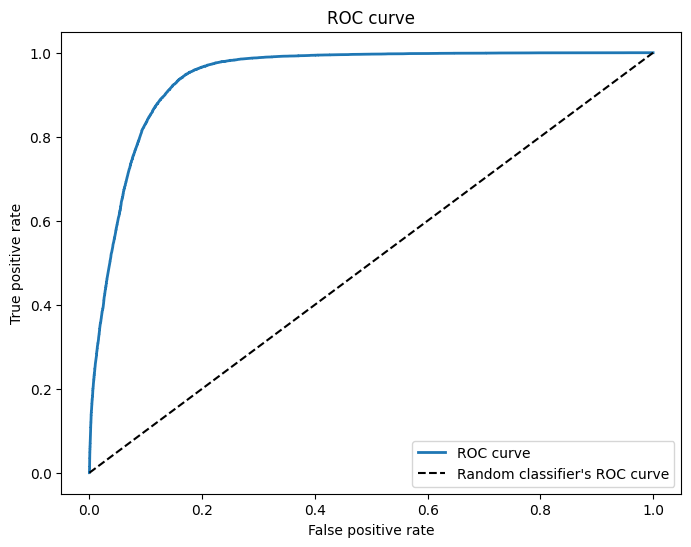

----------------------------------------------------------------------------------------------------
The AUC score is: 0.943913861079315
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.8403362416449819
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8221587292187893
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9535355397805845
----------------------------------------------------------------------------------------------------
The recall score is: 0.9535355397805845
----------------------------------------------------------------------------------------------------
The precision score is: 0.4626498479155484
----------------------------------------------------------------------------------------------------


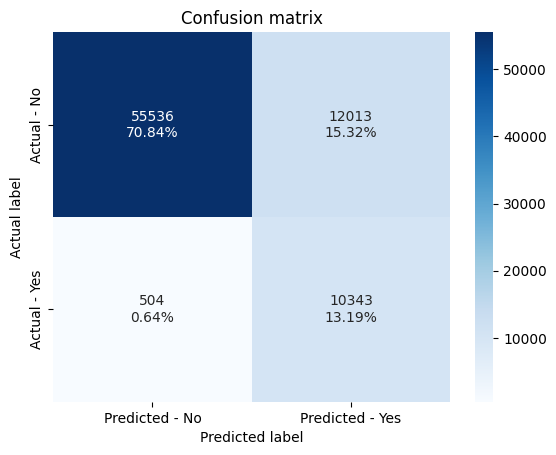

In [ ]:
##evaluate the model on the original test set
evaluation_metric(mlp_bsmote, X_bsmote, y_bsmote, XX, yy)

Observe:

- In terms of recall, this is the best results so far, with recall going over 95%
- Notice the clear cost in FP, which have increases to over 12000


### Log-Reg

In [ ]:
log_smote1 = SGDClassifier( alpha = 0.03 ,eta0=0.01, loss='log_loss', learning_rate='constant', penalty='l1', class_weight='balanced', random_state=233)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8532443369182527
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8582837273566228


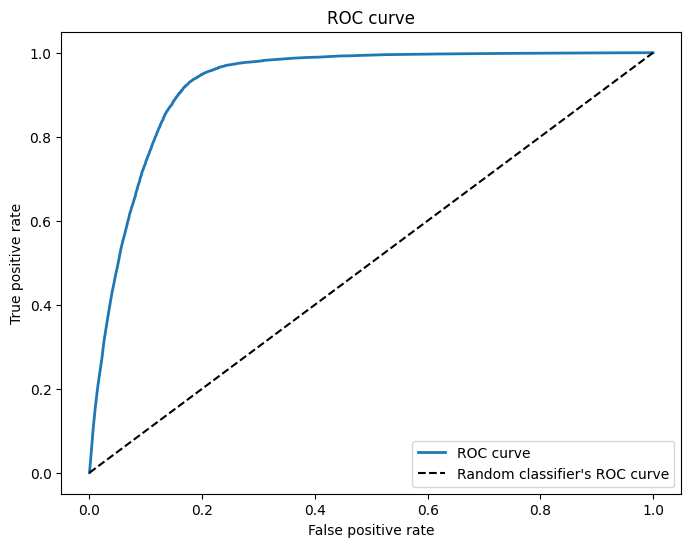

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9266749283748624
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.836484004285933
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8212556810611557
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9313174149534433
----------------------------------------------------------------------------------------------------
The recall score is: 0.9313174149534433
----------------------------------------------------------------------------------------------------
The precision score is: 0.455537518037518
----------------------------------------------------------------------------------------------------


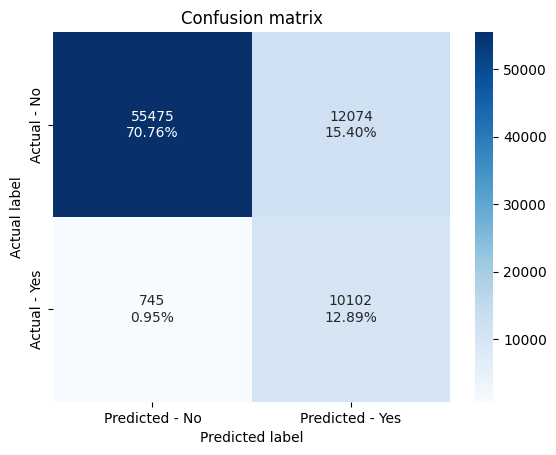

In [ ]:
evaluation_metric(log_smote1, X_bsmote, y_bsmote, XX, yy)

### XGBoost

In [ ]:
xgb_bsmote1 = XGBClassifier(n_estimators=500,  eta = 0.1, max_depth=9, learning_rate=0.01, objective='binary:logistic', sampling_method='uniform', grow_policy='depthwise', alpha=0.5, gamma=100, scale_pos_weight =1.0,   random_state=1924) #changed scale_pos_weight to 1

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8532443369182527
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.8582837273566228


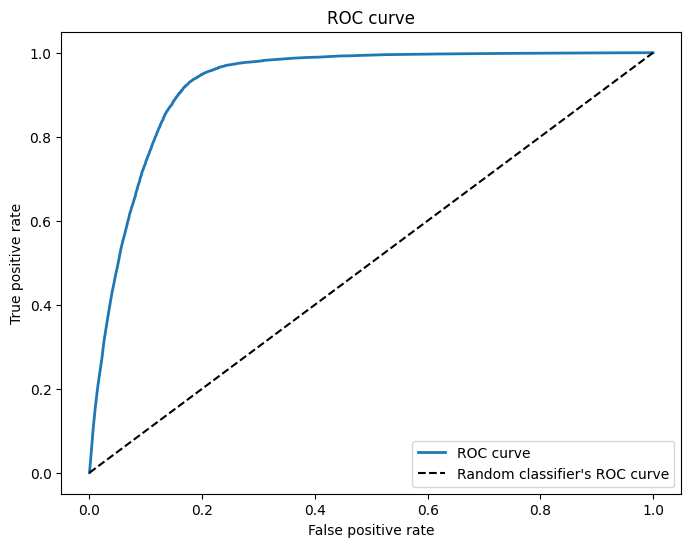

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9266749283748624
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.836484004285933
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8212556810611557
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9313174149534433
----------------------------------------------------------------------------------------------------
The recall score is: 0.9313174149534433
----------------------------------------------------------------------------------------------------
The precision score is: 0.455537518037518
----------------------------------------------------------------------------------------------------


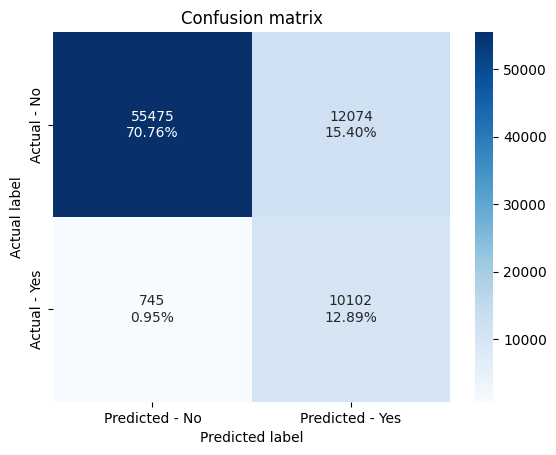

In [ ]:
evaluation_metric(log_smote1, X_bsmote, y_bsmote, XX, yy)

**Conclusions**

- A combination of Borderline-SMOTE oversampling technique , with a fine-tuned MLP CLassiffier achieves the best results in terms of recall, over 95%
- There is of course the cost of reduced accuracy: 84%
- The main strenght of this model is that it misclassifies *few* high_risk cases as low risk cases, and the main weakness is that it misclassifies *many* low risk cases as high risk ones

### Final MLP Tuning

In [ ]:
def opt_fmodel_mlp(search_space, n_iter, X, y):
    

        opt = BayesSearchCV(
            MLPClassifier(),
            search_space,
            n_iter=n_iter,
            scoring='recall',
            random_state=1923,
        )

        opt.fit(X, y)

        print("val. score: %s" % opt.best_score_)
        print("Best parameters: ", opt.best_params_)

        return opt

In [ ]:
fsearch_space = {'activation' : ['relu'],
                'solver' : ['adam'],
                'alpha' : (0.03, 0.05),
                'learning_rate' : ['constant'],
                }
        

In [ ]:
opt_fmodel_mlp(fsearch_space, 3, X_bsmote, y_bsmote)

val. score: 0.9301206590058426
Best parameters:  OrderedDict([('activation', 'relu'), ('alpha', 0.043179751271453876), ('learning_rate', 'constant'), ('solver', 'adam')])


BayesSearchCV(estimator=MLPClassifier(), n_iter=3, random_state=1923,
              scoring='recall',
              search_spaces={'activation': ['relu'], 'alpha': (0.03, 0.05),
                             'learning_rate': ['constant'],
                             'solver': ['adam']})

In [ ]:
mlp_final = MLPClassifier(activation= 'relu', alpha= 0.038, learning_rate= 'constant', solver= 'adam', random_state=1918)

----------------------------------------------------------------------------------------------------
The mean cross validation score on the training set is: 0.8684168136169983
----------------------------------------------------------------------------------------------------
The mean cross validation score on the test set is: 0.9115005951675906


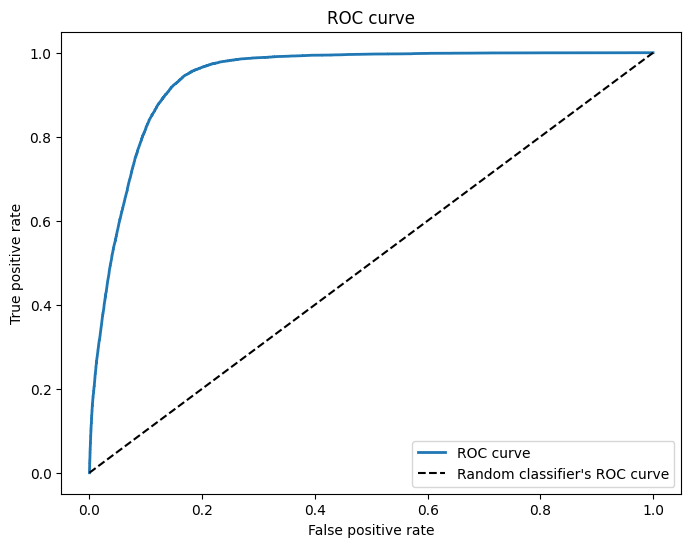

----------------------------------------------------------------------------------------------------
The AUC score is: 0.9416324746078942
----------------------------------------------------------------------------------------------------
The accuracy score is: 0.830667380988826
----------------------------------------------------------------------------------------------------
The true negative rate (TNR) is: 0.8098269404432338
----------------------------------------------------------------------------------------------------
The true positive rate (TPR) is: 0.9604498939799023
----------------------------------------------------------------------------------------------------
The recall score is: 0.9604498939799023
----------------------------------------------------------------------------------------------------
The precision score is: 0.4478163686382393
----------------------------------------------------------------------------------------------------


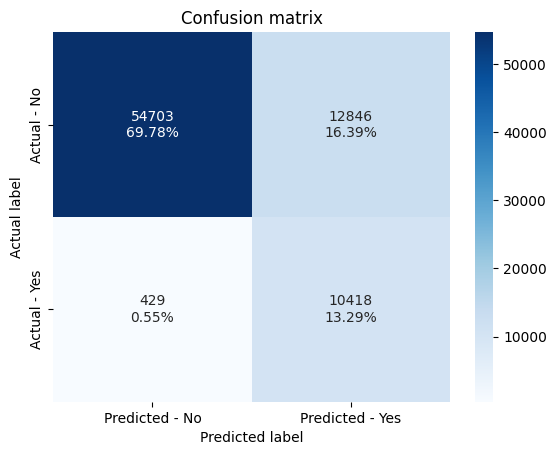

In [ ]:
evaluation_metric(mlp_final, X_bsmote, y_bsmote, XX, yy)

This model performs slightly better, although at a cost of accuracy which is quite low. So we cannot use the model to classify patients between High-Risk and Low-Risk, but we *can* use it to flag High Risk patients. If a patient is flagged as High Risk, there will be 96% confidence in that prediction to be correct. 

<a id='section9'></a>
# 9. Generalization Errors of Best Model

The aim of this section is to analyze the performance of the best model more thoroughly. As such, I will get the final predictions and calculate and interpret some performance metrics.

## <a id='section9_1'></a>Get Final Predictions 

In [ ]:
final_predictions = mlp_final.predict(XX) 

In [ ]:
##these are the final predictions on the test set
final_predictions

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
yy

439196    1
79519     0
402675    0
465637    1
515014    0
         ..
573811    0
21929     1
638509    0
41946     1
148142    0
Name: Higher_Risk, Length: 78396, dtype: int64

## <a id='section9_2'></a>MAE 

In [ ]:
from scipy import stats

In [ ]:
##let's set the confidence level to 95%
confidence = 0.95

In [ ]:
##this is simply a vector of sqaured errors
sqr_errors = (final_predictions - yy)**2

In [ ]:
##this is a vector containing the absolute errors
errors = np.abs(final_predictions - yy)

Let's calculate the confidence interval for the mean error

In [ ]:
(stats.t.interval(confidence, len(errors)-1, loc=errors.mean(), scale=stats.sem(errors)))

(0.16670722490965365, 0.17195801311269446)

And the root mean squared error:

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yy, final_predictions)

In [ ]:
mae

0.16933261901117405

Observe :

- The MAE simply reflects the accuracy of the classifier, which is actually quite bad due to many False Positives.

 <a id='section9_3'></a>
 ## Confusion Matrix

Let's also look at the confusion matrix for these final predictions with the MLP model

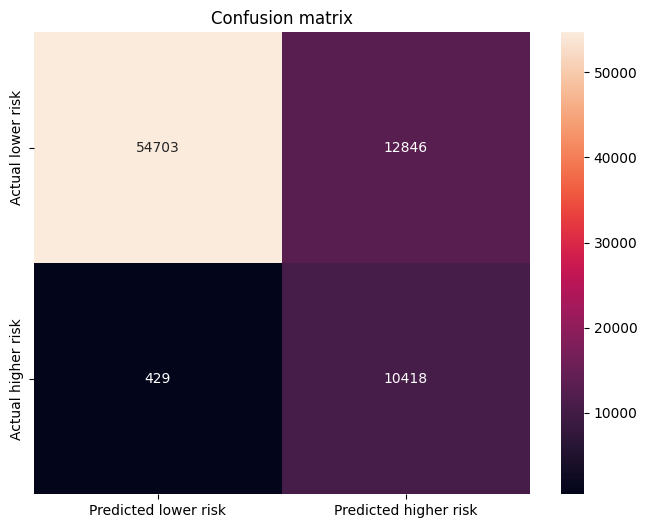

In [ ]:
conf_mat = confusion_matrix (yy, final_predictions)
cm_df = pd.DataFrame(conf_mat, columns=["Predicted lower risk", "Predicted higher risk"], index=["Actual lower risk", "Actual higher risk"])
##plot the confusion matrix via seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.show()


In [ ]:
yy.value_counts()

Higher_Risk
0    67549
1    10847
Name: count, dtype: int64

In [ ]:
len(yy)

78396

In [ ]:
print("Percentage of positive cases ('higher risk') in the test set", yy.value_counts()[1]/len(yy)*100)
print("Percentage of negative cases in the test set", yy.value_counts()[0]/len(yy)*100)

Percentage of positive cases ('higher risk') in the test set 13.83616511046482
Percentage of negative cases in the test set 86.16383488953518


 <a id='section9_4'></a>
 
 ## Accuracy

Let's also have a look at the accuracy of the model, which shows how many predictions (percetange wise) are correct. This metric is complementary to the TPR which is the most important for this case ( to predict well the minority class). However, accuracy can be useful too in understanding how the model performs. Since the test set contains highly imbalanced classes, we should get accuracy over 92% for the model to performs well by this metric. The reason for this is that around 92% of the data are 0's, so if a model would predict 0 all the time, it would be right 92% of the times. However, a model that predicts 0 all the time, is clearly not a good model.

In [ ]:
##calculate accuracy directly from Scikit-Learn's accuracy_score method
accuracy_score(yy, final_predictions)

0.830667380988826

The accuracy is clearly not very good, but as said before, the more important metric is TPR which is over 96%. To test the calculation above, it is simply to calculate the accuracy directly from the confusion matrix. It is the sum of true values (main diagonal) over all values.

In [ ]:
true_predictions = conf_mat[0][0] + conf_mat[1][1]
print ("The number of true predictions is", true_predictions)

The number of true predictions is 65121


In [ ]:
accuracy_hand = true_predictions/len(yy)
print ("The accuracy calculated by hand is", accuracy_hand)

The accuracy calculated by hand is 0.830667380988826


Clearly this calculation seems to be correct. Hence, we have a model that predicts correctly 85% of the time, but when it predicts a high risk covid patient, there is over 96% probability that the prediction is correct. Tthe confidence in the negative predictions are lower, with a true negative rate of 84.6%

 <a id='section10'></a> 
# 10. Launch

Now that we have our best model, let us save it for further use. I will use joblib to do it.

In [ ]:
import joblib

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('bucket_pipeline_1',
                                 Pipeline(steps=[('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=2,
                                                                   random_state=1923,
                                                                   strategy='kmeans')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MEDICAL_UNIT']),
                                ('categorical',
                                 Pipeline(steps=[('customtransformer',
                                                  CustomTransformer()),
                                                 ('oneh...
                                  'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
                                  'HIPERTENSION', 'OTHER_DISEASE',
                                  'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
                                  'TOBACCO', 'ICU']),
                                ('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE']),
                                ('categorical simple',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['SEX', 'PATIENT_TYPE']),
                                ('drop_age', 'drop',
                                 ['CLASIFFICATION_FINAL', 'Higher_Risk'])])

In [ ]:
joblib.dump(mlp_final, "MultiLayer_Perceptron_Classifier_Covid.pkl")

['MultiLayer_Perceptron_Classifier_Covid.pkl']

For further use, let us also save the preprocessing pipeline

In [ ]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('bucket_pipeline_1',
                                 Pipeline(steps=[('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=2,
                                                                   random_state=1923,
                                                                   strategy='kmeans')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MEDICAL_UNIT']),
                                ('categorical',
                                 Pipeline(steps=[('customtransformer',
                                                  CustomTransformer()),
                                                 ('oneh...
                                  'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
                                  'HIPERTENSION', 'OTHER_DISEASE',
                                  'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
                                  'TOBACCO', 'ICU']),
                                ('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE']),
                                ('categorical simple',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['SEX', 'PATIENT_TYPE']),
                                ('drop_age', 'drop',
                                 ['CLASIFFICATION_FINAL', 'Higher_Risk'])])

In [ ]:
joblib.dump(preprocessing, "preprocessing.pkl")

['preprocessing.pkl']